# Procrastinate Pro+

Несмотря на огромные вложения в рекламу развлекательного приложения Procrastinate Pro+, последние несколько месяцев компания терпит убытки. Наша задача — разобраться в причинах и помочь компании выйти в плюс.

**Цель исследования** - предстоит изучить и определить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

**Ход исследования**

Данные о пользователях мы получим из файлов: `visits_info_short.csv`, который хранит лог сервера с информацией о посещениях сайта, `orders_info_short.csv` — информацию о заказах, а `costs_info_short.csv` — информацию о расходах на рекламу. У нас нет сведений о качестве данных, поэтому понадобится обзор и подготовка данных к дальнейшему анализу.

Для расчёта и анализа метрик мы будем использовать готовые функции, с которыми познакомились на теоретических уроках.


Исследование пройдёт в несколько этапов:
1. Обзор и подготовка данных к анализу.
2. Определение функций для расчета и анализа метрик.
3. Исследовательский анализ данных.
4. Маркетинг.
5. Оценка окупаемости рекламы.


## Обзор и подготовка данных к анализу

Загрузим библиотеки

In [1]:
#импортируем библиотеку pandas, а также необходимые для дальнейшего анализа библиотеки и пакеты
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
import matplotlib.ticker as mtick
%matplotlib inline

# отключаем предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

In [2]:
#загрузим данные из файлов
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
except:
    visits = pd.read_csv('visits_info_short.csv')
    
try:
    orders = pd.read_csv('/datasets/orders_info_short.csv')
except:
    orders = pd.read_csv('orders_info_short.csv') 
    
try:
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    costs = pd.read_csv('costs_info_short.csv')

### Данные о визитах

Изучим данные о посещениях сайта

In [3]:
#получим общую информацию о данных в таблице visits
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


В таблице 6 столбцов. Согласно документации:

- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

Количество значений во всех столбцах одинаковое, пропусков в значениях нет.

Выведем названия столбцов

In [4]:
# перечень названий столбцов таблицы visits
print(visits.columns)

Index(['User Id', 'Region', 'Device', 'Channel', 'Session Start',
       'Session End'],
      dtype='object')


Приведем названия колонок в соответствие с хорошим стилем:
* названия запишем в «змеином_регистре»,
* все символы сделаем строчными,
* устраним пробелы.

Для этого переименуем колонки так:
* `'User Id'` → `'user_id'`;
* `'Region'` → `'region'`;
* `'Device'` → `'device'`;
* `'Channel'` → `'channel'`;
* `'Session Start'` → `'session_start'`;
* `'Session End'` → `'session_end'`.

In [5]:
# переименование столбцов
# Создадим словарь для переименования столбцов, в котором укажем старые и новые наименования.

new_names = {'User Id' : 'user_id', 'Region' : 'region', 'Device' : 'device', 'Channel' : 'channel',
             'Session Start' : 'session_start', 'Session End' : 'session_end'}

# вызовем метод rename() и передадим ему словарь с соответствием старых и новых значений колонок
# результат сохраним в переменной visits

visits = visits.rename(columns=new_names)

Проверим результат. Для этого ещё раз выведем на экран названия столбцов:

In [6]:
# проверка результатов - перечень названий столбцов
print(visits.columns)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')


Проверим наличие явных дубликатов

In [7]:
# подсчёт явных дубликатов
print(visits.duplicated().sum())

0


Преобразуем значения в столбцах `session_start` и `session_end` в формат datetime.

In [8]:
visits['session_start']=pd.to_datetime(visits['session_start'])
visits['session_end']=pd.to_datetime(visits['session_end'])

Проверяем, что тип данных поменялся:

In [9]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


Выведем первые пять строк датафрейма:

In [10]:
visits.head(5)

user_id         region   device  channel       session_start  \
0  981449118918  United States   iPhone  organic 2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic 2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic 2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop 2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic 2019-05-01 03:33:35   

          session_end  
0 2019-05-01 02:45:01  
1 2019-05-01 04:47:35  
2 2019-05-01 15:32:08  
3 2019-05-01 00:54:25  
4 2019-05-01 03:57:40

Посмотрим уникальные значения в столбцах `region`, `device` и `channel`.

In [11]:
for col in ['region', 'device', 'channel']:
    print("столбец {} содержит значения {}\n".format(col, visits[col].sort_values().unique()))

столбец region содержит значения ['France' 'Germany' 'UK' 'United States']

столбец device содержит значения ['Android' 'Mac' 'PC' 'iPhone']

столбец channel содержит значения ['AdNonSense' 'FaceBoom' 'LeapBob' 'MediaTornado' 'OppleCreativeMedia'
 'RocketSuperAds' 'TipTop' 'WahooNetBanner' 'YRabbit' 'lambdaMediaAds'
 'organic']



### Данные о заказах

Изучим данные о заказах

In [12]:
#получим общую информацию о данных в таблице orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


В таблице 3 столбцa. Согласно документации:

- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа

Количество значений во всех столбцах одинаковое, пропусков в значениях нет.

Выведем названия столбцов

In [13]:
# перечень названий столбцов таблицы orders
print(orders.columns)

Index(['User Id', 'Event Dt', 'Revenue'], dtype='object')


Приведем названия колонок в соответствие с хорошим стилем:

In [14]:
#создадим список с новыми наименованиями столбцов
columns=['user_id', 'event_dt', 'revenue']

#переименуем столбцы
orders.columns=columns

# и проверим, что наименования поменялись
print(orders.columns)

Index(['user_id', 'event_dt', 'revenue'], dtype='object')


Преобразуем значения в столбце event_dt в формат datetime.

In [15]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

Проверим типы данных

In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


Выведем первые пять строк таблицы с заказами:

In [17]:
orders.head()

user_id            event_dt  revenue
0  188246423999 2019-05-01 23:09:52     4.99
1  174361394180 2019-05-01 12:24:04     4.99
2  529610067795 2019-05-01 11:34:04     4.99
3  319939546352 2019-05-01 15:34:40     4.99
4  366000285810 2019-05-01 13:59:51     4.99

Проверим наличие явных дубликатов в данных о заказах

In [18]:
# подсчёт явных дубликатов
print(orders.duplicated().sum())

0


### Данные о расходах на рекламу

Изучим данные о стоимости рекламы

In [19]:
#получим общую информацию о данных в таблице visits
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


В таблице 3 столбца. Согласно документации:

- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

Количество значений во всех столбцах одинаковое, пропусков в значениях нет.

Приведём названия колонок к общепринятому стилю.

In [20]:
#приводим наименования столбцов к нижнему регистру
costs.columns = costs.columns.str.lower()

#выводим наименования столбцов
print(costs.columns)

Index(['dt', 'channel', 'costs'], dtype='object')


Преобразуем значения в столбце dt в формат date.

In [21]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Проверим наличие явных дубликатов.

In [22]:
costs.duplicated().sum()

0

Посмотрим каков набор рекламных источников

In [23]:
costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

Выведем пять cлучайных строк датафрейма:

In [24]:
costs.sample(5)

dt       channel   costs
897   2019-10-25       YRabbit    7.56
160   2019-10-08      FaceBoom  201.30
1135  2019-06-25       LeapBob   14.91
350   2019-10-18  MediaTornado    4.32
703   2019-10-11        TipTop  483.00

Итак, мы загрузили данные, убедились, что в них отсутстуют пропуски и дубликаты.
Привели наименования столбцов к общепринятому стилю.
Изменили тип данных для столбцов, которые содержат дату и время.

## Определение функций для расчёта и анализа LTV, ROI, удержания и конверсии.

Зададим функции для создания профилей, расчёта удержания, конверсии, LTV и ROI. 

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

### Функция get_profiles()

In [25]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


### Функция get_retention()

In [26]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция get_conversion()

In [27]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция get_ltv()

In [28]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### Функция filter_data()

In [29]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### Функция plot_retention()

In [30]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

### Функция plot_conversion()

In [31]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Функция plot_ltv_roi()

In [32]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

### Профили пользователей

Составим профили пользователей

In [33]:
events=None
profiles = get_profiles(visits, orders, events, costs)

In [34]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150008 entries, 0 to 150007
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           150008 non-null  int64         
 1   first_ts          150008 non-null  datetime64[ns]
 2   channel           150008 non-null  object        
 3   device            150008 non-null  object        
 4   region            150008 non-null  object        
 5   dt                150008 non-null  object        
 6   month             150008 non-null  datetime64[ns]
 7   payer             150008 non-null  bool          
 8   acquisition_cost  150008 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 10.4+ MB


In [35]:
display(profiles.head(5))

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

Определим минимальную и максимальную даты привлечения пользователей:

In [36]:
print('Минимальная дата привлечения пользователей:  {}\nМаксимальная дата привлечения пользователей: {} \
      '.format(profiles['dt'].min(), profiles['dt'].max()))

Минимальная дата привлечения пользователей:  2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27       


### Регионы

Выясним, из каких стран пользователи приходят в приложение

In [37]:
for i, country in enumerate(profiles['region'].unique()):
    print(str(i+1)+".", country)

1. United States
2. France
3. Germany
4. UK


Построим таблицу, отражающую количество пользователей из каждой страны, а также долю и количество платящих. 

In [38]:
#группируем данные по регионам и определяем количество пользователей, долю и количество платящих
report = profiles.groupby('region').agg({'user_id' : 'count', 'payer' : ['mean', 'sum']})
#переименовываем столбцы
report.columns=['total_users', 'proportion_of_payers', 'payers'] 
#сортируем по убыванию количества пользователей
report = report.sort_values(by='total_users', ascending=False)         
display(report)  

total_users  proportion_of_payers  payers
region                                                  
United States       100002              0.069019    6902
UK                   17575              0.039829     700
France               17450              0.037994     663
Germany              14981              0.041119     616

In [39]:
#добавим колонку с отображением доли в виде процентов
report['percent_of_payers'] = report['proportion_of_payers'] * 100

Посмотрим на столбчатых диаграммах, как соотносятся регионы по количеству пользователей, по количеству платящих пользователей, и по доле платящих пользователей в каждом из регионов.

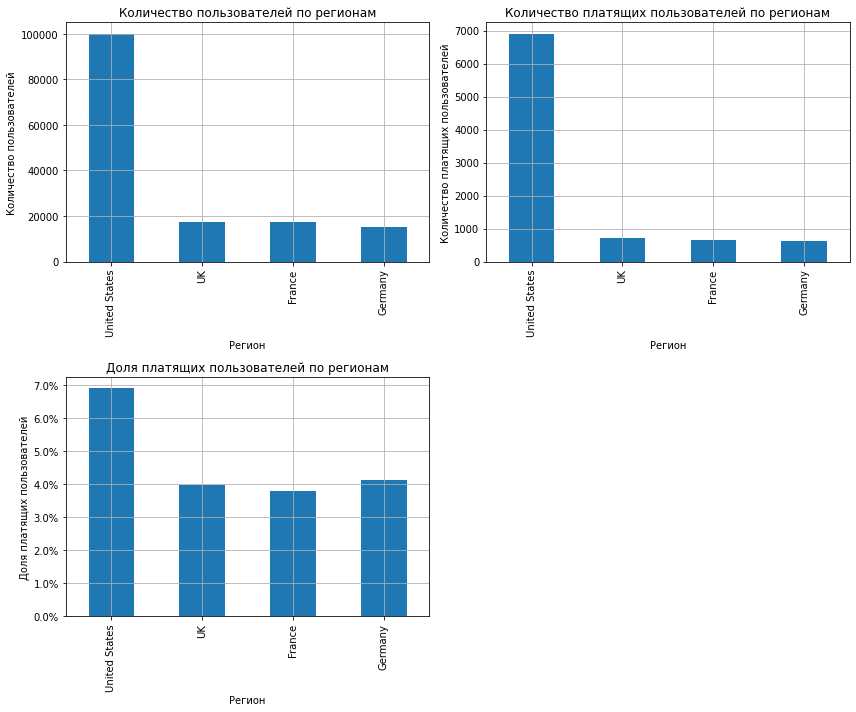

In [40]:
plt.figure(figsize=(12, 10))
plt.subplot(2,2,1)
report['total_users'].plot(kind='bar', grid=True)
plt.title('Количество пользователей по регионам')
plt.xlabel("Регион")
plt.ylabel("Количество пользователей")

plt.subplot(2,2,2)
report['payers'].plot(kind='bar', grid=True)
plt.title('Количество платящих пользователей по регионам')
plt.xlabel("Регион")
plt.ylabel("Количество платящих пользователей")

ax=plt.subplot(2,2,3)
report['percent_of_payers'].plot(kind='bar', grid=True)
plt.title('Доля платящих пользователей по регионам')
plt.xlabel("Регион")
plt.ylabel("Доля платящих пользователей")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.tight_layout()

plt.show()

Больше всего пользователей приложения находятся в США и наиболее высокая доля платящих также приходится на США.

Ниже на круговых диаграммах видно, что на США приходится две трети от общего числа пользователей и около восьмидесяти процентов от общего числа платящих пользователей. 

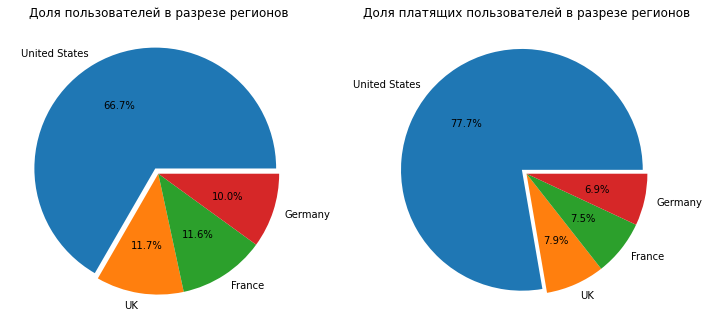

In [41]:
plt.subplot(1,2,1)
explode=(0.05,0,0,0)
report['total_users'].plot(kind='pie', figsize=(12,5), autopct='%.1f%%', explode=explode)
plt.title('Доля пользователей в разрезе регионов')
plt.ylabel("")

plt.subplot(1,2,2)
explode=(0.05,0,0,0)
report['payers'].plot(kind='pie', figsize=(10,5), autopct='%.1f%%', explode=explode)
plt.title('Доля платящих пользователей в разрезе регионов')
plt.ylabel("")

plt.tight_layout()
plt.show()

Построим график, отображающий динамику привлечения новых пользователей по каждому из регионов.

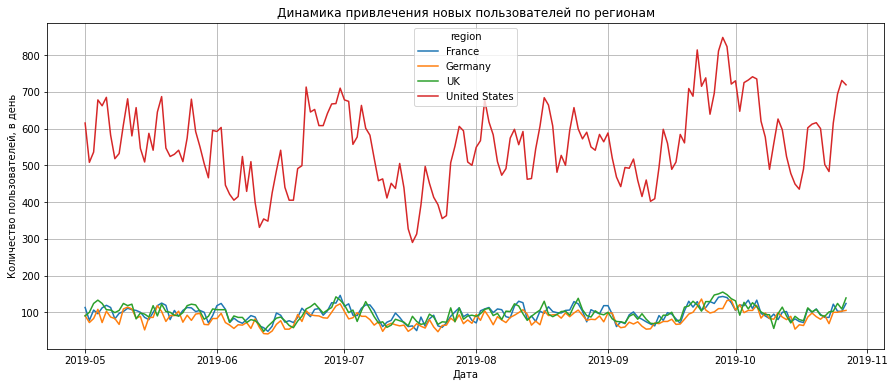

In [42]:
profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns='region',  # регион пользователя
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(15, 6), grid=True)
plt.title('Динамика привлечения новых пользователей по регионам')
plt.ylabel('Количество пользователей, в день')
plt.xlabel('Дата')
plt.show()


Ежедневно из Великобритании, Франции и Германии приходят примерно по 100 новых пользователей, а из США от 400 до 800 пользователей.

США является лидером по общему количеству пользователей, почти в 6 раз опережая любую из других стран, и по количеству платящих пользователей, более чем в 10 раз опережая по этому показателю другие страны, и по доле платящих пользователей в регионе, которая составляет `6.9%`, в то время как в Великобритании, Франции и Германии доля платящих пользователей находится в диапазоне от `3.8%` до `4.1%`.

### Устройства

Определим, какими устройствами пользуются клиенты:

In [43]:
for i, device in enumerate(profiles['device'].unique()):
    print(str(i+1)+".", device)

1. Mac
2. iPhone
3. PC
4. Android


Всего 4 вида устройств: два из них - компьютеры семейств Mac и PC, и ещё два - мобильные устройства - iPhone и Android.

Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [44]:
#группируем данные по типу устройства и определяем количество пользователей, долю и количество платящих
report = profiles.groupby('device').agg({'user_id' : 'count', 'payer' : ['mean', 'sum']})
#переименовываем столбцы
report.columns=['total_users', 'proportion_of_payers', 'payers']
#сортируем по убыванию количества пользователей
report = report.sort_values(by='total_users', ascending=False)         
display(report)  

total_users  proportion_of_payers  payers
device                                            
iPhone         54479              0.062079    3382
Android        35032              0.058518    2050
PC             30455              0.050468    1537
Mac            30042              0.063644    1912

Отобразим на столбчатых диаграммах количество пользователей и долю платящих пользователей в разрезе типов устройств.

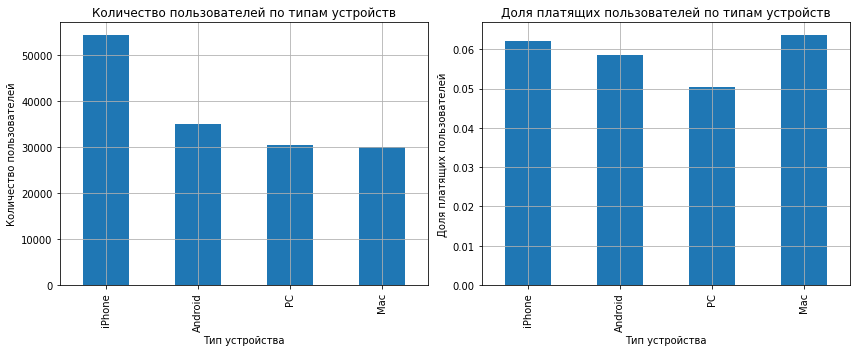

In [45]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
report['total_users'].plot(kind='bar', grid=True)
plt.title('Количество пользователей по типам устройств')
plt.xlabel("Тип устройства")
plt.ylabel("Количество пользователей")

ax=plt.subplot(1,2,2)
report['proportion_of_payers'].plot(kind='bar', grid=True)
plt.title('Доля платящих пользователей по типам устройств')
plt.xlabel("Тип устройства")
plt.ylabel("Доля платящих пользователей")

plt.tight_layout()

plt.show()

IPhone опережает всех по общему количеству пользователей, далее с большим отрывом идут устройства на базе Android, и замыкают список PC и Mac с примерно одинаковым количеством клиентов.

По доле платящих пользователей лидируют устройства фирмы Apple: Mac и iPhone. От них незначительно отстают устройства на платформе Android, а хуже всего пользователи конвертируются в платящих на PC.

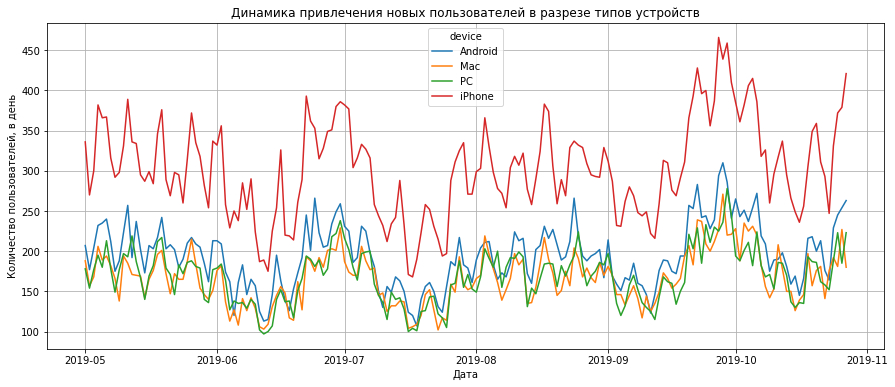

In [46]:
profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns='device',  # тип устройства
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(15, 6), grid=True)
plt.title('Динамика привлечения новых пользователей в разрезе типов устройств')
plt.ylabel('Количество пользователей, в день')
plt.xlabel('Дата')
plt.show()

Динамика привлечения новых клиентов схожа по амплитуде для всех типов устройств. 

### Рекламные каналы

Определим, рекламные источники, из которых поступают клиенты:

In [47]:
print('Рекламные каналы:')
for i, channel in enumerate(profiles['channel'].unique()):
    print(str(i+1)+".", channel)

Рекламные каналы:
1. FaceBoom
2. organic
3. AdNonSense
4. YRabbit
5. MediaTornado
6. RocketSuperAds
7. LeapBob
8. TipTop
9. WahooNetBanner
10. OppleCreativeMedia
11. lambdaMediaAds


Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [48]:
#группируем данные по каналу привлечения и определяем количество пользователей, долю и количество платящих
report = profiles.groupby('channel').agg({'user_id' : 'count', 'payer' : ['mean', 'sum']})
#переименовываем столбцы
report.columns=['total_users', 'proportion_of_payers', 'payers'] 
#сортируем по убыванию количества пользователей
report = report.sort_values(by='total_users', ascending=False)         
display(report)  

total_users  proportion_of_payers  payers
channel                                                      
organic                   56439              0.020553    1160
FaceBoom                  29144              0.122049    3557
TipTop                    19561              0.096007    1878
OppleCreativeMedia         8605              0.027077     233
LeapBob                    8553              0.030633     262
WahooNetBanner             8553              0.052964     453
RocketSuperAds             4448              0.079137     352
MediaTornado               4364              0.035747     156
YRabbit                    4312              0.038265     165
AdNonSense                 3880              0.113402     440
lambdaMediaAds             2149              0.104700     225

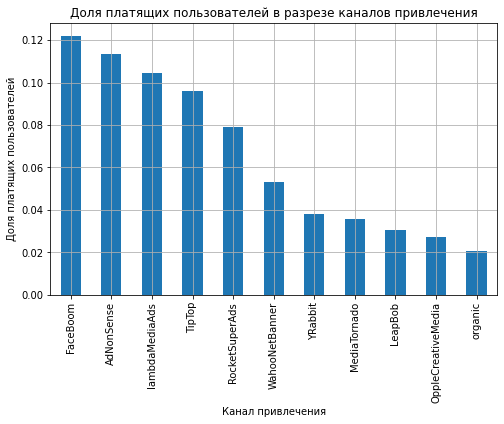

In [49]:
#строим диаграмму доли платящих с сортировкой по убыванию этой доли
(report.sort_values(by='proportion_of_payers', ascending=False)['proportion_of_payers']
    .plot(kind='bar', grid=True, figsize=(8,5))
)
plt.title('Доля платящих пользователей в разрезе каналов привлечения')
plt.xlabel("Канал привлечения")
plt.ylabel("Доля платящих пользователей")
plt.show()

По доле платящих лидируют `FaceBoom`, `AdNonSense` и `lambdaMediaAds`.

Отобразим на столбчатых диаграммах количество пользователей и долю платящих пользователей в разрезе каналов привлечения.

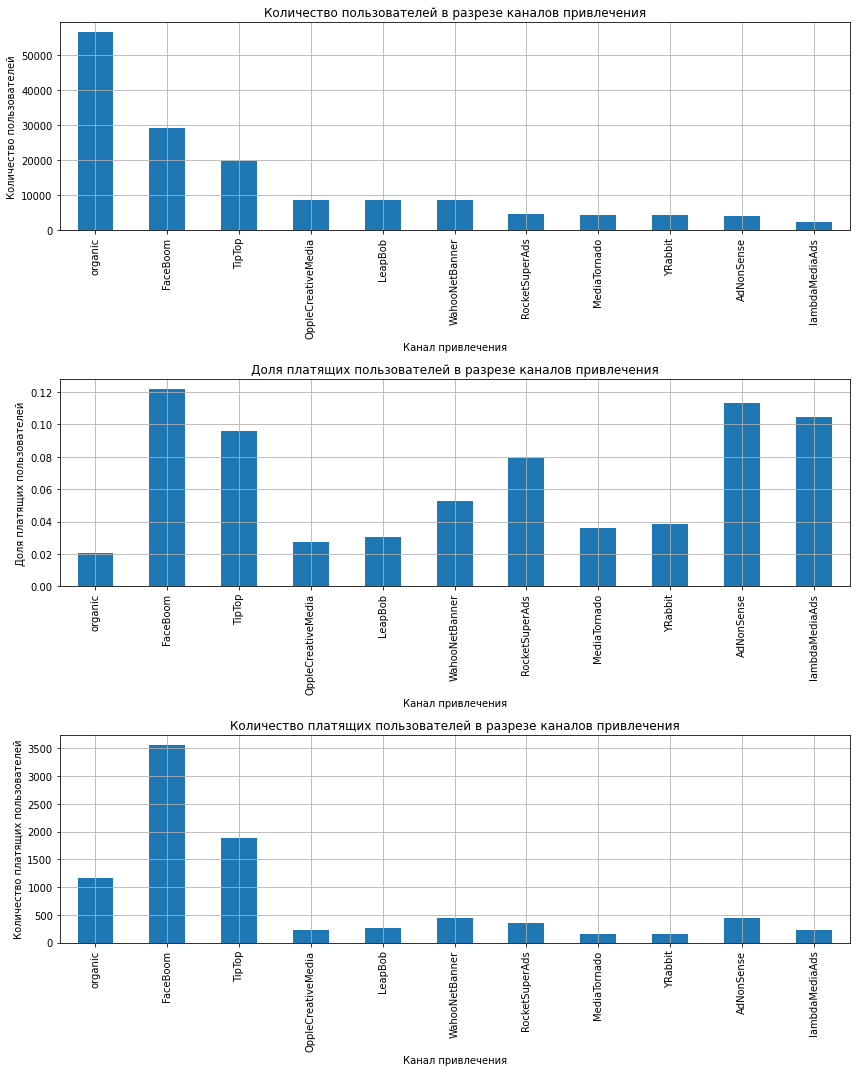

In [50]:
plt.figure(figsize=(12, 15))
plt.subplot(3,1,1)
report['total_users'].plot(kind='bar', grid=True)
plt.title('Количество пользователей в разрезе каналов привлечения')
plt.xlabel("Канал привлечения")
plt.ylabel("Количество пользователей")

ax=plt.subplot(3,1,2)
report['proportion_of_payers'].plot(kind='bar', grid=True)
plt.title('Доля платящих пользователей в разрезе каналов привлечения')
plt.xlabel("Канал привлечения")
plt.ylabel("Доля платящих пользователей")

ax=plt.subplot(3,1,3)
report['payers'].plot(kind='bar', grid=True)
plt.title('Количество платящих пользователей в разрезе каналов привлечения')
plt.xlabel("Канал привлечения")
plt.ylabel("Количество платящих пользователей")
plt.tight_layout()

plt.show()

Больше всего пользователей являются "органическими", то есть нашли наше приложение самостоятельно. Но доля платящих среди них не велика и составляет всего `2%`, что является худшим показателем.

Второе и третье место по общему количеству привлеченных пользователей занимают `FaceBoom` и `TipTop`, и у них же одни из лучших показателей по доле платящих пользоваталей, в районе `10%-12%`.

В итоге, наибольшее количество платящих пользователей привлекают `FaceBoom` и `TipTop`.

Хорошие показатели по доле платящих клиентов имеют каналы `AdNonSense` и `lambdaMediaAds`, но так как общее количество клиентов, привлеченных по этим каналам, небольшое относительно других каналов, то и по количеству платящих клиентов они не могут похвастаться большими значениями.

Для наглядности построим две круговые диаграммы. В первом случае объединим в категорию "Другие" те каналы, которые привлекли менее 5% пользователей, а во втором - те каналы, которые привлекли менее 5% **платящих** пользователей.

In [51]:
#создаем таблицу для построения круговой диаграммы,
#в которой объединим в категорию "Другие" те каналы,
#которые привлекают менее 5% от общего количества пользователей
report1=report.copy().reset_index()
report1['channel2']=report1['channel']
report1.loc[report1['total_users'] / report1['total_users'].sum() < 0.05, 'channel2'] = 'Другие'
report1=report1.set_index('channel').groupby('channel2').agg({'total_users' : 'sum'})

In [52]:
#создаем таблицу для построения круговой диаграммы,
#в которой объединим в категорию "Другие" те каналы,
#которые привлекают менее 5% платящих пользователей
report2=report.copy().reset_index()
report2['channel2']=report2['channel']
report2.loc[report2['payers'] / report2['payers'].sum() < 0.05, 'channel2'] = 'Другие'
report2=report2.set_index('channel').groupby('channel2').agg({'payers' : 'sum'})

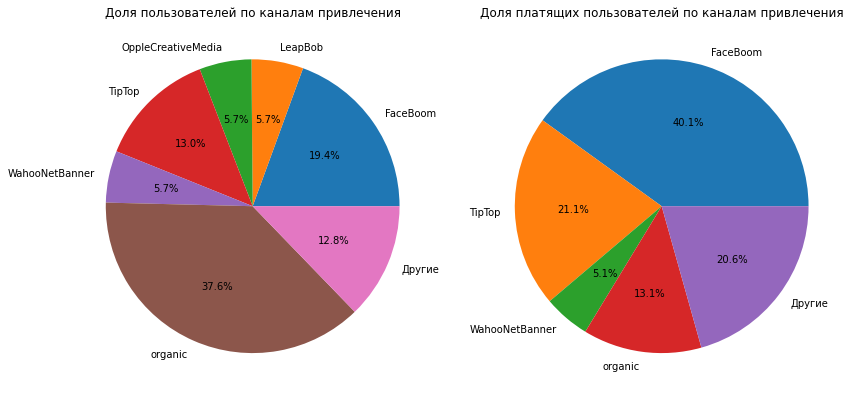

In [53]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
report1['total_users'].plot(kind='pie', autopct='%.1f%%')
plt.title('Доля пользователей по каналам привлечения')
plt.ylabel("")

plt.subplot(1,2,2)
report2['payers'].plot(kind='pie', autopct='%.1f%%')
plt.title('Доля платящих пользователей по каналам привлечения')
plt.ylabel("")

plt.tight_layout()
plt.show()

При помощи круговой диаграммы еще раз убеждаждаемся, что больше всего платящих клиентов пришли из каналов `FaceBoom` и `TipTop`. Вместе они привлекли более 60% платящях пользователей.

Построим график динамики привлечения новых пользователей из различных рекламных каналов:

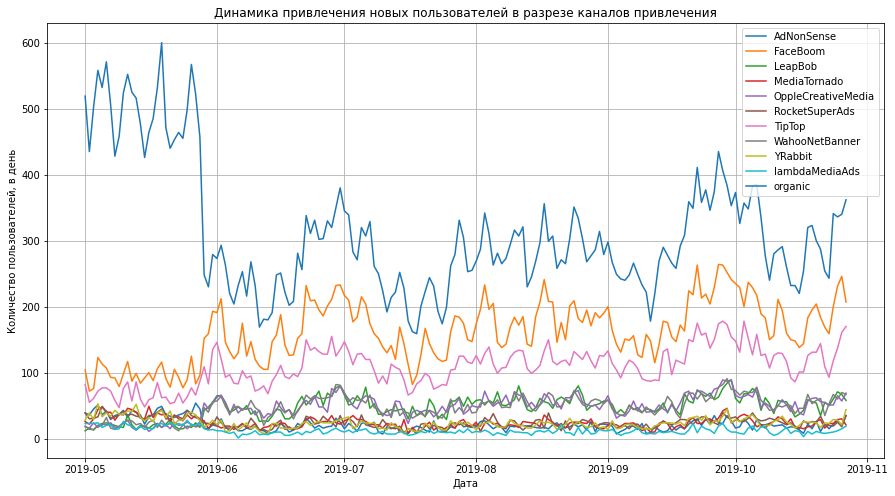

In [54]:
profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns='channel',  # канал привлечения
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(15, 8), grid=True)
plt.title('Динамика привлечения новых пользователей в разрезе каналов привлечения')
plt.ylabel('Количество пользователей, в день')
plt.xlabel('Дата')
plt.legend(loc='upper right')
plt.show()

Можно заметить, что в июне 2019 года почти в два раза упал трафик органических пользователей, и в это же время увеличилось количество клиентов, привлекаемых через каналы `FaceBoom` и `TipTop`.

## Маркетинг

### Сумма расходов на маркетинг

Посчитаем общую сумму расходов на маркетинг:

In [55]:
print(f"Общая сумма расходов на маркетинг составила \
{round(profiles['acquisition_cost'].sum(), 2)} долларов.")

Общая сумма расходов на маркетинг составила 105497.3 долларов.


### Расходы на маркетинг по рекламным источникам

Определим, сколько всего средств было затрачено на рекламу по каждому каналу привлечения клиентов.

In [56]:
report_cost = (profiles.groupby('channel')
    .agg({'acquisition_cost' : 'sum'})
    .sort_values(by='acquisition_cost', ascending=False)
)
display(report_cost)

acquisition_cost
channel                             
TipTop                      54751.30
FaceBoom                    32445.60
WahooNetBanner               5151.00
AdNonSense                   3911.25
OppleCreativeMedia           2151.25
RocketSuperAds               1833.00
LeapBob                      1797.60
lambdaMediaAds               1557.60
MediaTornado                  954.48
YRabbit                       944.22
organic                         0.00

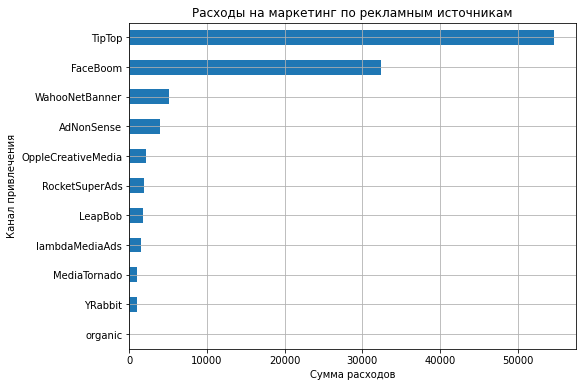

In [57]:
report_cost.sort_values(by='acquisition_cost').plot(kind='barh', grid=True, figsize=(8,6), legend=None)
plt.title('Расходы на маркетинг по рекламным источникам')
plt.xlabel("Сумма расходов")
plt.ylabel("Канал привлечения")
plt.show()

Наибольший рекламный бюджет, `$54751.30`  был выделен на канал привлечения `TipTop`, а вторым по затратам с суммой `$32445.60` стал `FaceBoom`.

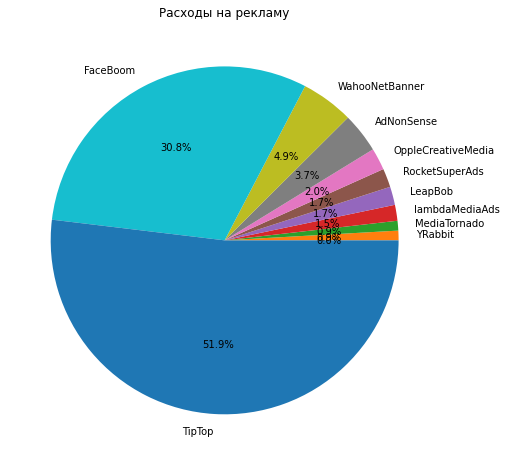

In [58]:
data = report_cost.sort_values(by='acquisition_cost')['acquisition_cost']
(report_cost.sort_values(by='acquisition_cost')['acquisition_cost']
     .plot(kind='pie', figsize=(8,8), autopct='%.1f%%')
)
plt.title('Расходы на рекламу')
plt.ylabel("")
plt.show()

На два канала, `TipTop` и `FaceBoom`, потрачено 82% от всех расходов на рекламу.

### Динамика изменения расходов на рекламу

Чтобы посчитать недельные и месячные затраты на рекламу, преобразуем данные о времени и выделим год, месяц и неделю привлечения пользователя в отдельные столбцы.

In [59]:
#добавляем колонки с годом, месяцем и неделей привлечения пользоватателя
profiles['first_ts_year'] = profiles['first_ts'].dt.year
profiles['first_ts_month'] = profiles['first_ts'].dt.month
profiles['first_ts_week'] = profiles['first_ts'].dt.isocalendar().week

Построим визуализацию динамики изменения расходов во времени.

Выведем графики с общими расходами по неделям и месяцам, и аналогичные графики в разрезе каналов привлечения.

Так как на органических пользователей деньги не тратятся, то уберём линию для канала organic, чтобы не "замусоривать" графики лишней информацией.

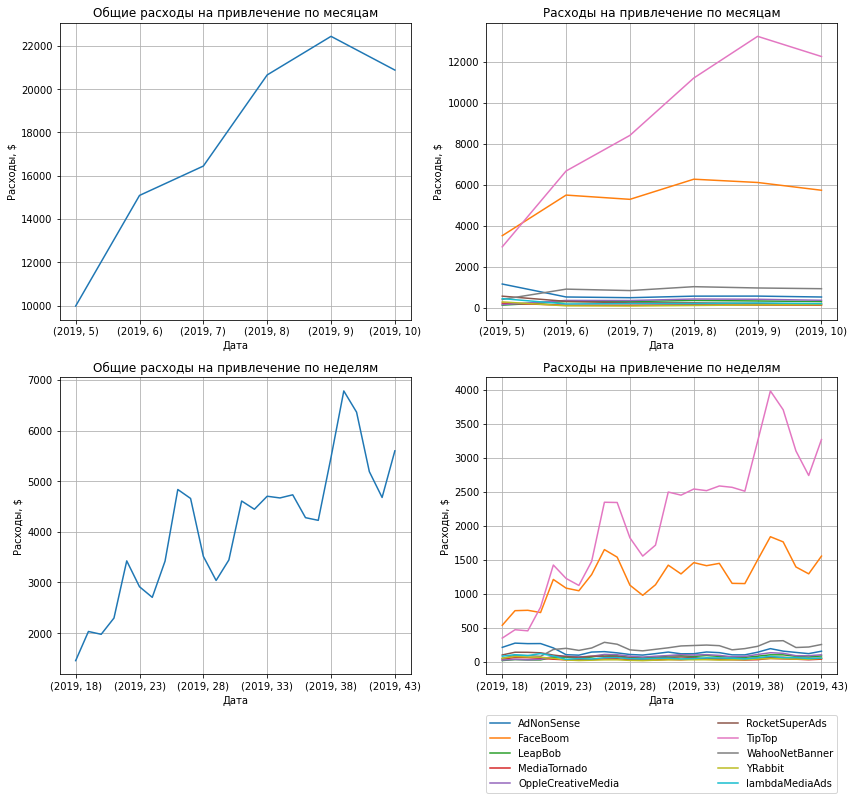

In [60]:
plt.figure(figsize=(12,10))

ax1=plt.subplot(2,2,1)
profiles.pivot_table(
    index=['first_ts_year', 'first_ts_month'],
#    columns='channel',
    values='acquisition_cost',
    aggfunc='sum',
).plot(kind='line', ax=ax1, grid=True, legend=None)
plt.title('Общие расходы на привлечение по месяцам')
plt.xlabel("Дата")
plt.ylabel("Расходы, $")

ax2=plt.subplot(2,2,2)
profiles.pivot_table(
    index=['first_ts_year', 'first_ts_month'],
    columns='channel',
    values='acquisition_cost',
    aggfunc='sum',
).drop(columns=['organic']).plot(kind='line', ax=ax2, grid=True, legend=None)
plt.title('Расходы на привлечение по месяцам')
plt.xlabel("Дата")
plt.ylabel("Расходы, $")

ax3=plt.subplot(2,2,3)
profiles.pivot_table(
    index=['first_ts_year', 'first_ts_week'],
#    columns='channel',
    values='acquisition_cost',
    aggfunc='sum',
).plot(kind='line', ax=ax3, grid=True, legend=None)
plt.title('Общие расходы на привлечение по неделям')
plt.xlabel("Дата")
plt.ylabel("Расходы, $")

ax4=plt.subplot(2,2,4)
profiles.pivot_table(
    index=['first_ts_year', 'first_ts_week'],
    columns='channel',
    values='acquisition_cost',
    aggfunc='sum',
).drop(columns=['organic']).plot(kind='line', ax=ax4, grid=True)
plt.title('Расходы на привлечение по неделям')
plt.xlabel("Дата")
plt.ylabel("Расходы, $")
plt.legend(bbox_to_anchor=(0., -0.4, 1., 1.), 
                      ncol=2, mode="expand", borderaxespad=0.)

plt.tight_layout()
plt.show()

Расходы на рекламу растут. В основном за счет роста расходов на канал `TipTop`. Вторым по затратам идёт канал `FaceBoom`, расходы на который росли некоторое время, но потом стабилизировались и держатся примерно на одном уровне. Остальные каналы привлечения не занимают большой доли в расходах на рекламу, и траты на них держатся примерно на одном уровне, не имея трендов на увеличение либо уменьшение.

### CAC стоимость привлечения одного клиента

In [61]:
report = profiles.groupby('channel').agg({'acquisition_cost' : 'mean'})
report.columns=['cac']

Выведем среднее значение CAC по всем каналам.

In [62]:
#выводим среднее значение cac по всем источникам привлечения
print('Средняя стоимость привлечения клиента CAC составляет ${}.'.format(round(report['cac'].mean(),2)))

Средняя стоимость привлечения клиента CAC составляет $0.69.


In [63]:
display(report.sort_values(by='cac', ascending=False))

cac
channel                     
TipTop              2.799003
FaceBoom            1.113286
AdNonSense          1.008054
lambdaMediaAds      0.724802
WahooNetBanner      0.602245
RocketSuperAds      0.412095
OppleCreativeMedia  0.250000
YRabbit             0.218975
MediaTornado        0.218717
LeapBob             0.210172
organic             0.000000

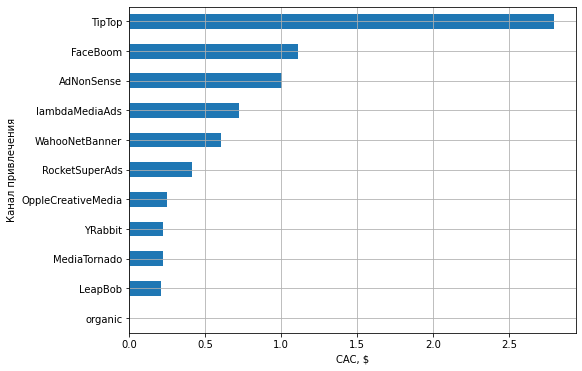

In [64]:
report.sort_values(by='cac').plot(kind='barh', grid=True, figsize=(8,6), legend=None)
plt.xlabel('CAC, $')
plt.ylabel('Канал привлечения')
plt.show()

Привлечение одного пользователя наиболее дорого обходится в канале `TipTop`. Стоимость клиента в этом канале почти в 2.5 раза выше по сравнению с идущими на втором-третьем местах по этому показателю источниками клиентов: `FaceBoom` и `AdNonSense`.

Средняя стоимость привлечения одного пользователя среди всех рекламных каналов составляет 0.76 доллара, а для канала `TipTop` - 2.8 доллара.

## Оценка окупаемости рекламы

Установим момент и горизонт анализа данных. Мы проводим анализ 1 ноября 2019 года, эта дата и будет моментом анализа. 

В бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Поэтому зададим горизонт анализа 14 дней.

In [65]:
observation_date = datetime(2019, 11, 1).date() #момент анализа
horizon_days = 14 #горизонт анализа

print(observation_date)
print (horizon_days)

2019-11-01
14


Так как наша задача - разобраться почему вложения в рекламу не приносят прибыли, то исключим из анализа органических пользователей, на которых не тратится рекламный бюджет.

In [66]:
#исключаем из анализа органических пользователей
profiles=profiles.query('channel!="organic"')

### LTV, ROI и динамика изменения LTV, CAC и ROI.

Оценим общую ситуацию — посмотрим на окупаемость рекламы. Рассчитаем и визуализируем LTV и ROI, вызвав функции get_ltv() и plot_ltv_roi().

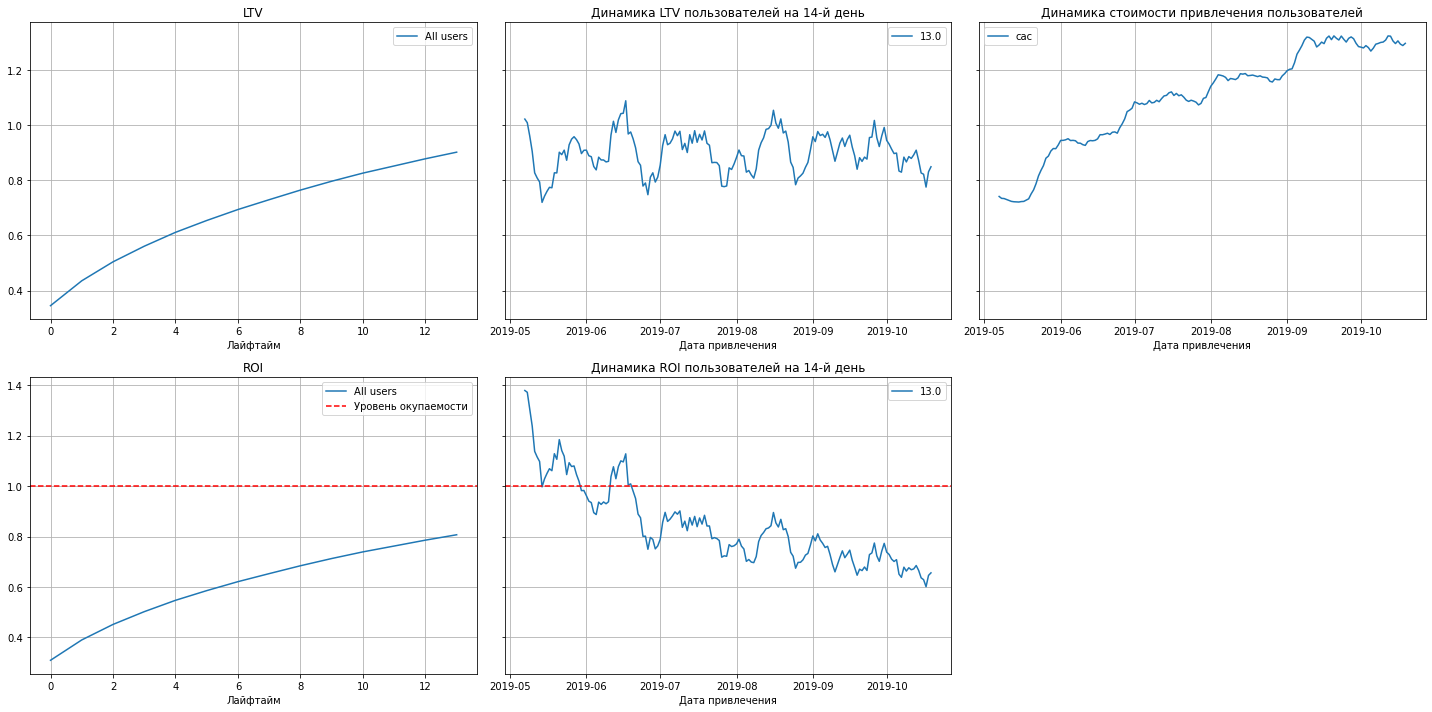

In [67]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам можно сделать следующие выводы:
- Реклама не окупается. ROI по истечении двух недель составляет около 80%.
- LTV в среднем держится на одном уровне, хотя за последний месяц можно отметить тенденцию к снижению.
- CAC значительно вырос. Как мы видели ранее, рекламный бюджет увеличивается, а динамика привлечения клиентов не меняется, что в совокупности приводит к росту CAC.  За рассматриваемый период CAC вырос практически в два раза, с `$0.7` до `$1.3`. Хотя в последние пару месяцев рост CAC приостановился и держится на достигнутом уровне. Приостановка роста CAC видимо связана со стабилизацией и даже некоторым снижением общего объёма средств, выделяемых на рекламу, которое мы видели на графиках динамики расходов на рекламу.


### Конверсия и удержание пользователей

#### Конверсия (Conversion)

Проверим конверсию и динамику конверсии пользователей на 14-й день после привлечения.

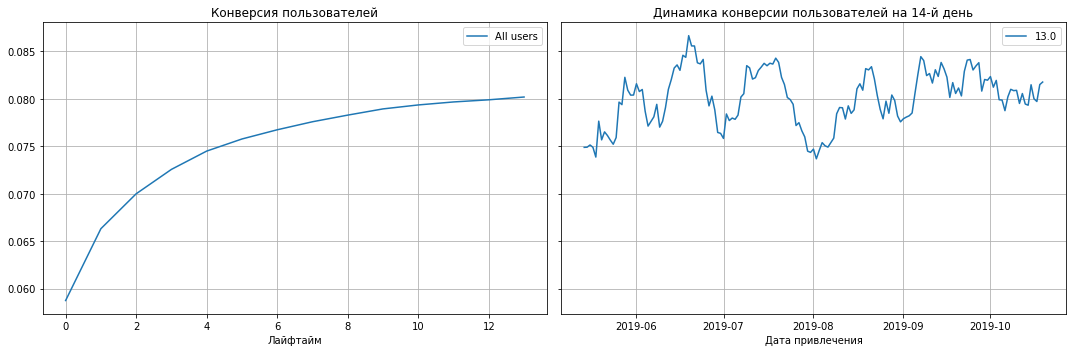

In [68]:
# считаем конверсию и её динамику для 14-го дня
conversion_raw, conversion, conversion_history = get_conversion(profiles,
    orders,
    observation_date,
    horizon_days
)

#строим графики
plot_conversion(conversion, conversion_history, horizon_days, window=14)

Конверсия на 14-й день колеблется в диапазоне от 7 до 9 процентов, но в среднем стабильна и большую часть времени находится выше 8%.

#### Удержание (Retention)

Проверим удержание и динамику удержания пользователей на 14-й день после привлечения.

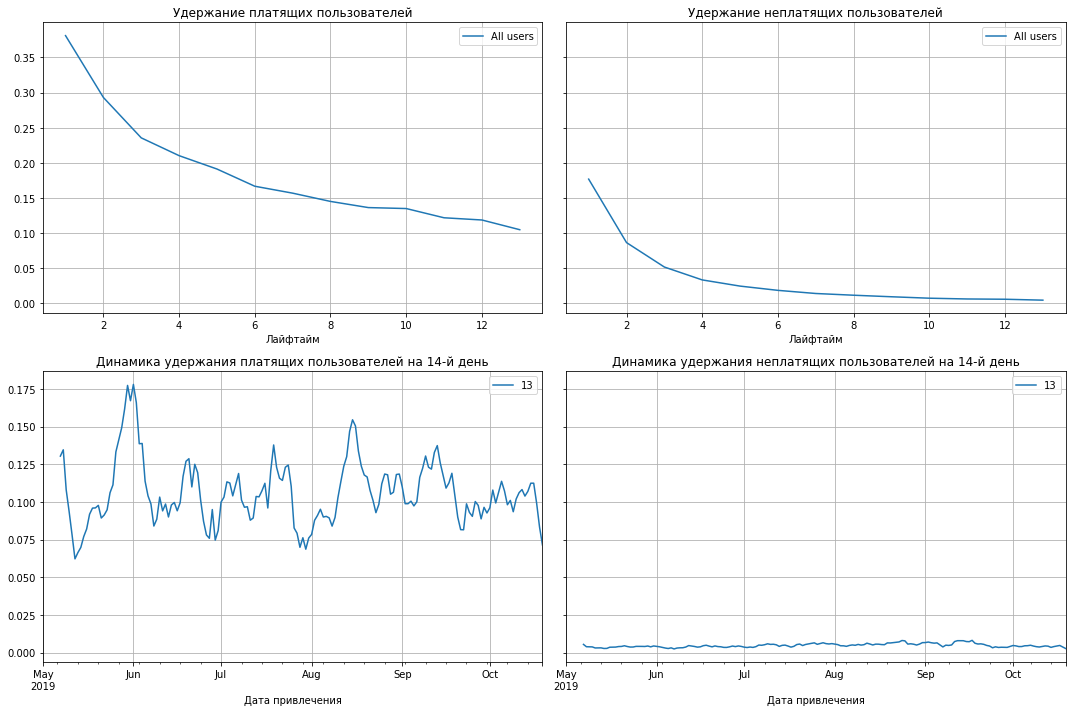

In [69]:
# считаем удержание пользователей и динамику удержания на 14-й день
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

#строим графики
plot_retention(retention, retention_history, horizon_days, window=7)

Если смотреть в целом на удержание и динамику удержания, то картина обычная. Удержание платящих пользователей превышает уровень удержания неплатящих. Уровень удержания плавно снижается и к концу второй недели составляет около 10%.

Чтобы разобраться в причинах неэффективности рекламы, пройдём по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения.

### Окупаемость рекламы с разбивкой по устройствам


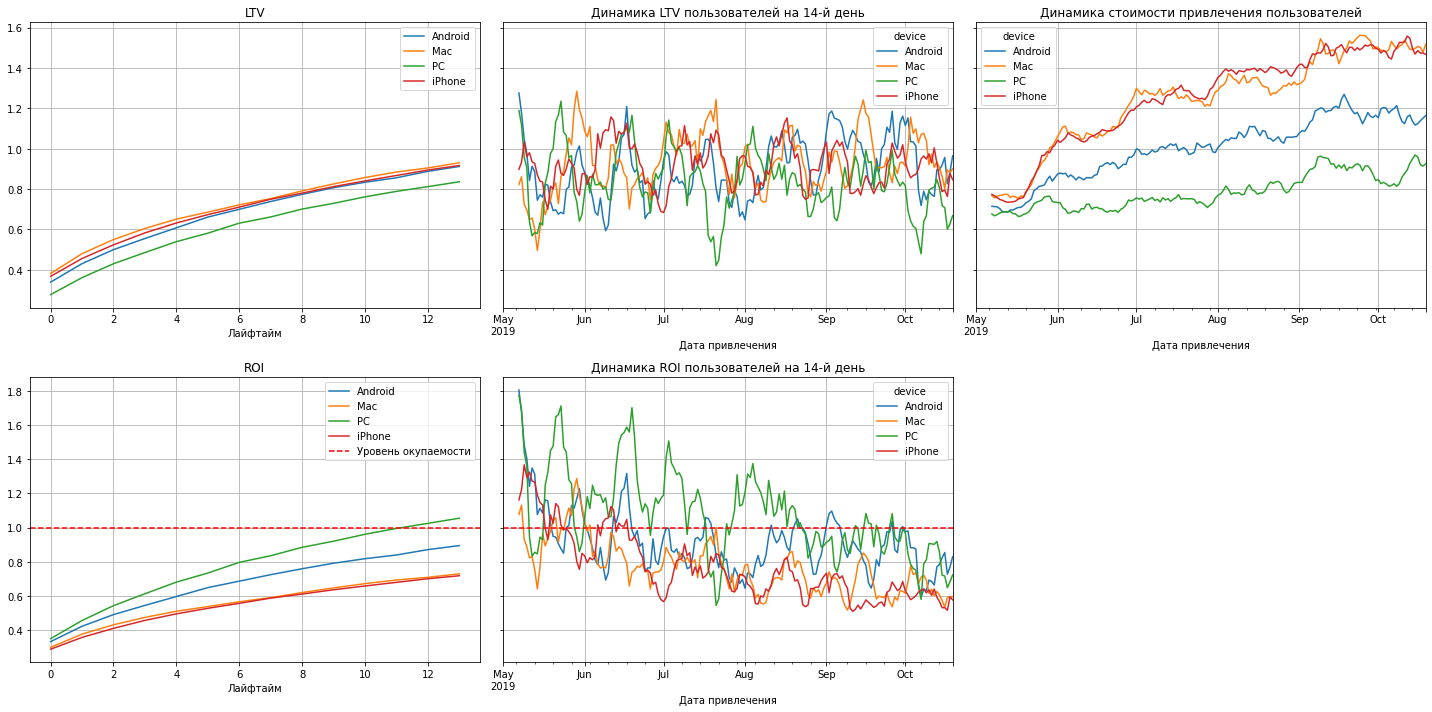

In [70]:
# считаем LTV и ROI в разрезе устройств
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

- Реклама окупается только для `PC`.
- Значения LTV на `Android`, `Mac` и `iPhone` примерно одинаковы. Платформа `PC` уступает остальным по LTV, но при этом `PC` выходит на уровень окупаемости за счет более низкой цены привлечения пользователей.
- Значение ROI на 14 день стабильно ухудшается с течением времени, но так как динамика схожа для всех платформ, то видимо не от типа устройства зависит причина, по которой не окупается реклама. 

Рассмотрим конверсию и удержание пользователей в разрезе типа устройств.

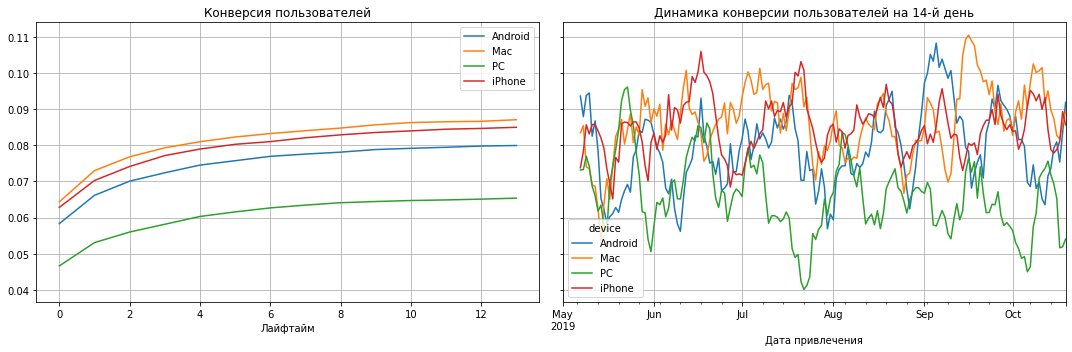

In [71]:
# считаем конверсию и её динамику для 14-го дня в разрезе устройств
conversion_raw, conversion, conversion_history = get_conversion(profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device']
)

#строим графики
plot_conversion(conversion, conversion_history, horizon_days, window=7)

Конверсия для пользователей PC уступает остальным платформам.

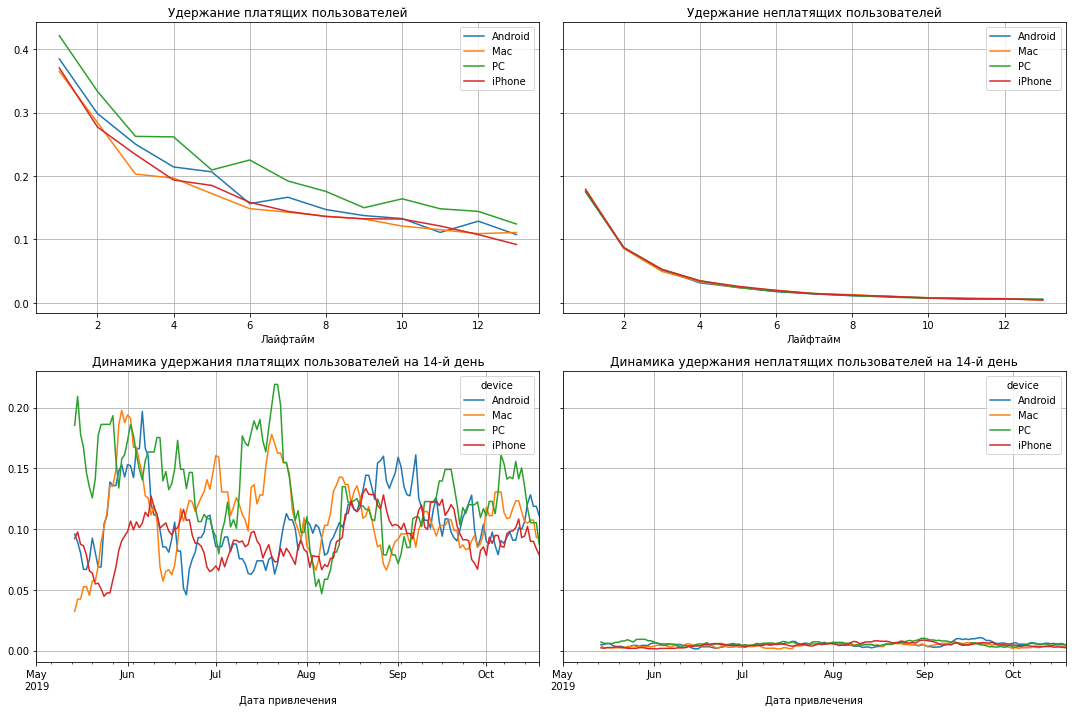

In [72]:
# считаем удержание пользователей и динамику удержания на 14-й день в разрезе устройств
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

#строим графики
plot_retention(retention, retention_history, horizon_days, window=14)

Удержание находится примерно на одном уровне для различных типов устройств.

- Реклама окупается только для `PC`, хотя в динамике видим, что и он с сентября перестал окупаться, а уровень конверсии для `PC` существенно уступает конверсии на других устройствах.
- Значения LTV на `Android`, `Mac` и `iPhone` примерно одинаковы. Платформа `PC` уступает остальным по LTV, но при этом `PC` выходит на уровень окупаемости за счет более низкой цены привлечения пользователей.
- Значение ROI на 14 день стабильно ухудшается с течением времени, но так как динамика схожа для всех платформ, то видимо не от типа устройства зависит причина, по которой не окупается реклама. 

### Окупаемость рекламы с разбивкой по странам

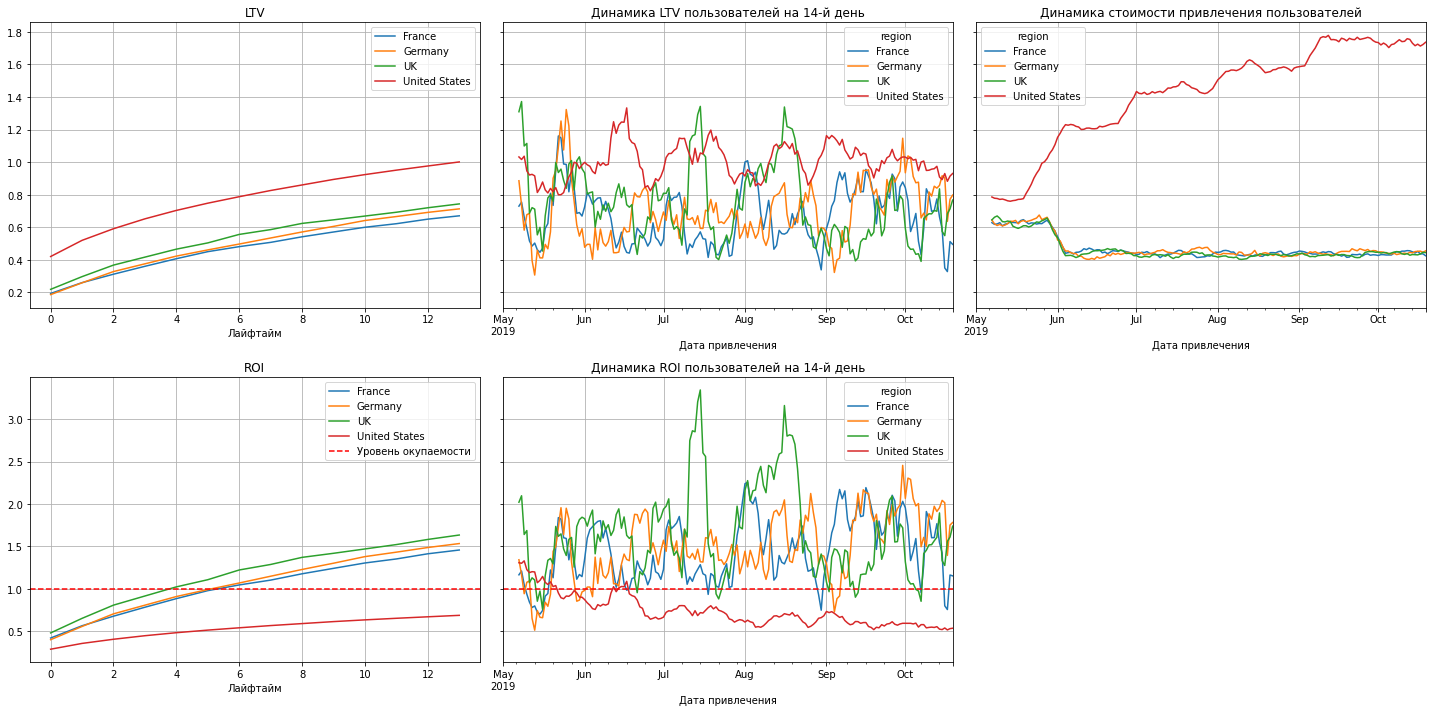

In [73]:
# считаем LTV и ROI в разрезе стран
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

- Реклама окупается для всех регионов кроме США.
- США уверенно обгоняют по LTV все другие регионы, и это хороший знак с учетом того, что по статистике в США больше всего пользователей и платящих клиентов. Но по остальным показателям США выглядят ужасно по сравнению с другими регионами.
- Стоимость привлечения пользователей в США значительно выросла и в 4! раза превышает стоимость привлечения в других странах, в которых CAC наоборот снизился в июне и далее держится на одном уровне. 
- ROI в США снижается, а в остальных регионах имеет колебания, но в среднем держится выше уровня окупаемости.


Можно сделать вывод, что проблема связана с регионом: США тянет вниз показатели окупаемости.

Посмотрим отдельно на рекламный рынок в США.

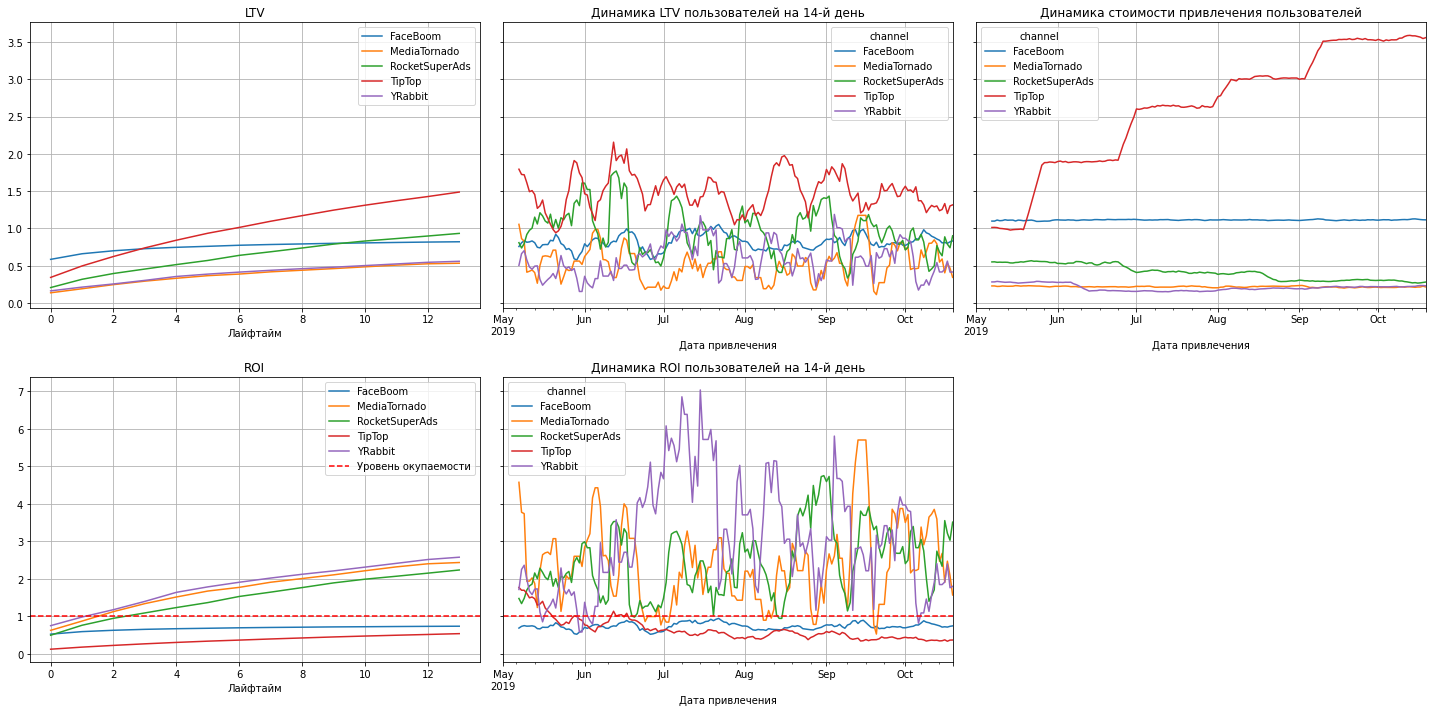

In [74]:
# считаем LTV и ROI только для США в разрезе рекламных каналов
#выделяем клиентов из США
profiles_usa = profiles[profiles['region']=='United States']
#считаем показателя для клиентов из США в разрезе рекламных каналов
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=['channel']
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

В США реклама ведётся через пять каналов. Два из них, `TipTop` и `FaceBoom`, не окупаются. Судя по динамике ROI, `FaceBoom` не окупался никогда за всё время наблюдения, а `TipTop` ушёл ниже уровня окупаемости в июне, когда на рекламу через этот канал стали выделять больше средств.

Посмотрим, в чём ещё причины проблем в США, кроются ли они в низкой конверсии или низком удержании.

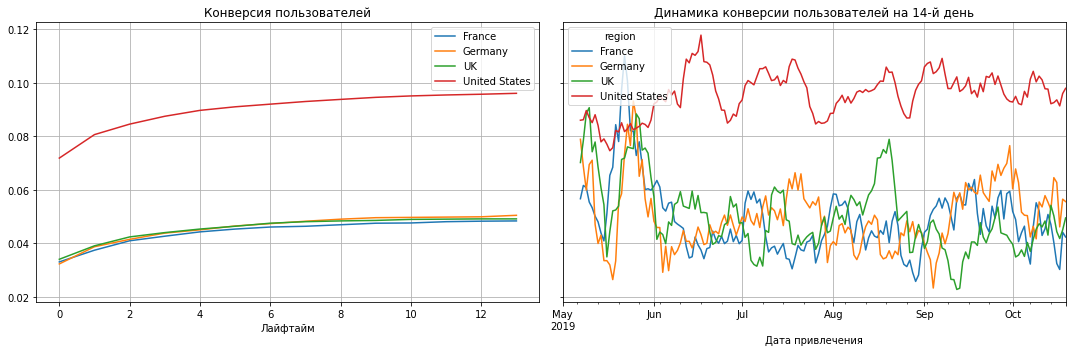

In [75]:
# считаем конверсию и её динамику для 14-го дня в разрезе стран
conversion_raw, conversion, conversion_history = get_conversion(profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region']
)

#строим графики
plot_conversion(conversion, conversion_history, horizon_days, window=7)

С конверсией в США всё хорошо. Этот показатель почти в два раза выше, чем в других странах. Динамика конверсии также держится на стабильном уровне.

Проверим удержание по странам.

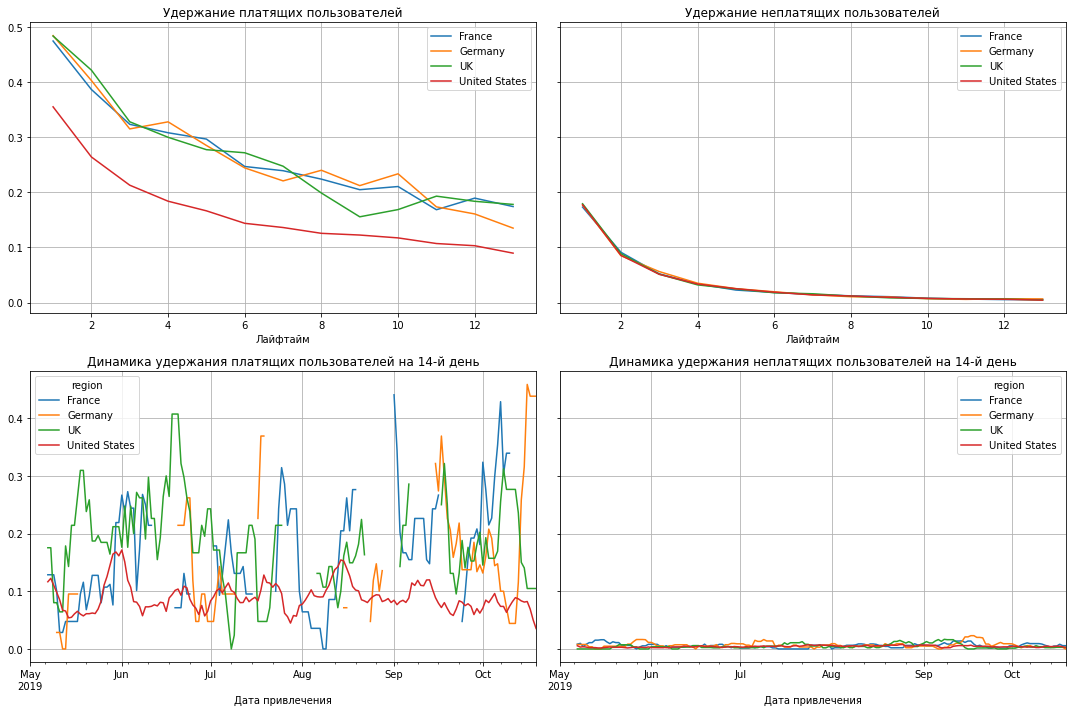

In [76]:
# считаем удержание пользователей и динамику удержания на 14-й день в разрезе стран
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

#строим графики
plot_retention(retention, retention_history, horizon_days, window=7)

А вот удержание платящих пользователей в США хуже чем в других странах. Это один из факторов, негативно влияющих на окупаемость. 

Рост стоимости привлечения пользователей в США может быть связан с эффективностью рекламных каналов. Посмотрим показатели окупаемости в зависимости от источника привлечения клиентов.

### Окупаемость рекламы с разбивкой по рекламным каналам

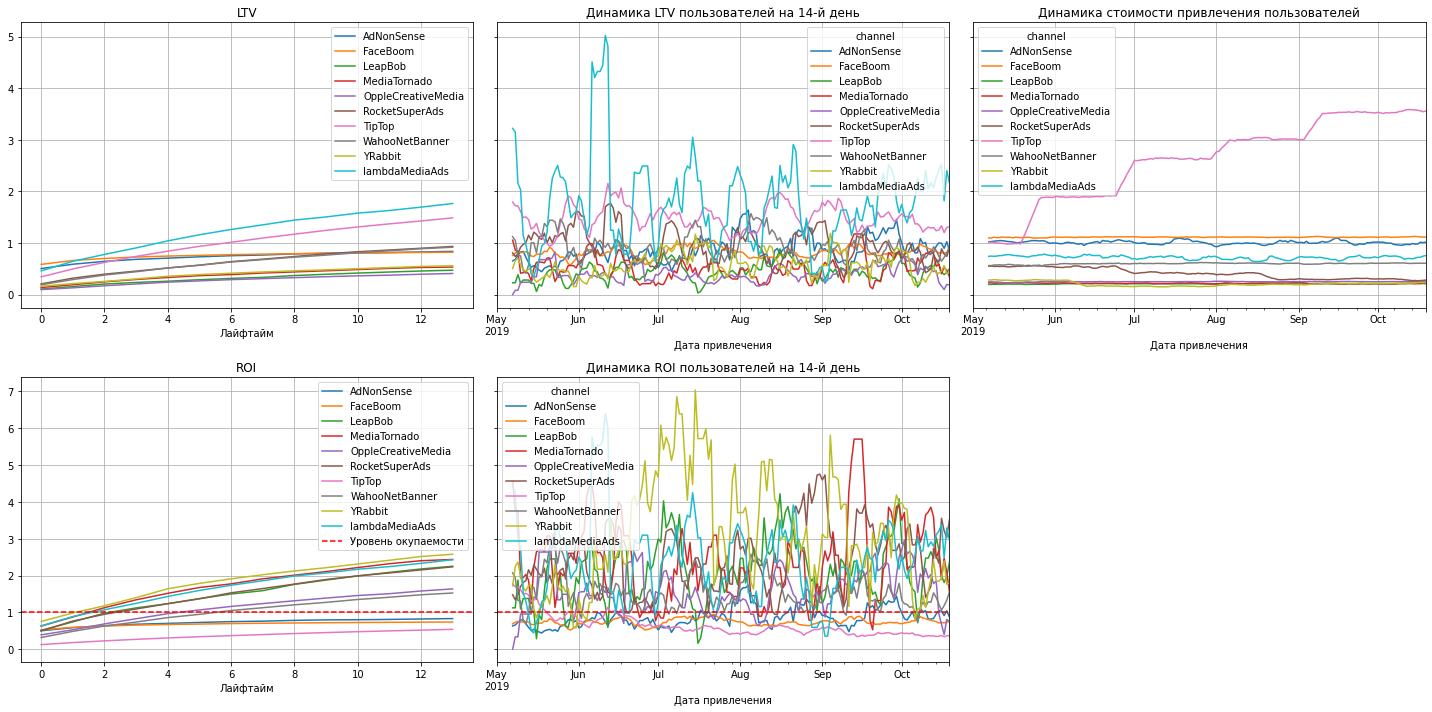

In [77]:
# считаем LTV и ROI в разрезе рекламных каналов
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

- Видно, что стоимость привлечения по каналу `TipTop` растет скачкообразно каждый месяц, и к дате анализа в несколько раз превышает стоимость привлечения по остальным каналам, для который значение CAC является стабильным на протяжении всех месяцев наблюдения.
- Реклама не окупается для трёх каналов: `TipTop`, `FaceBoom` и `AdNonSense`. Выделим их и рассмотрим отдельно от других.



Рассмотрим профили пользователей, пришедших из рекламных каналов, которые не окупаются - где ROI меньше 1. 

In [78]:
# определяем список рекламных каналов, по которым ROI меньше 1 на 14-й день
df_weak_channels = roi_grouped.reset_index()[roi_grouped.reset_index()[13]<1][['channel', 13]].sort_values(by=13)
display(df_weak_channels)
weak_channels=list(df_weak_channels['channel'])

channel      13.0
6      TipTop  0.539532
1    FaceBoom  0.737790
0  AdNonSense  0.831337

Вот три источника, которые не выходят на окупаемость. Хуже всех `TipTop`.
Для наглядности выведем на графики данные только по этим каналам.

Выделяем профили пользователей, пришедших из "слабых" по окупаемости рекламных каналов.

In [79]:
#выделяем профили пользователей по источника превлечения с ROI < 1
profiles_weak_channels = profiles.query('channel in @weak_channels')

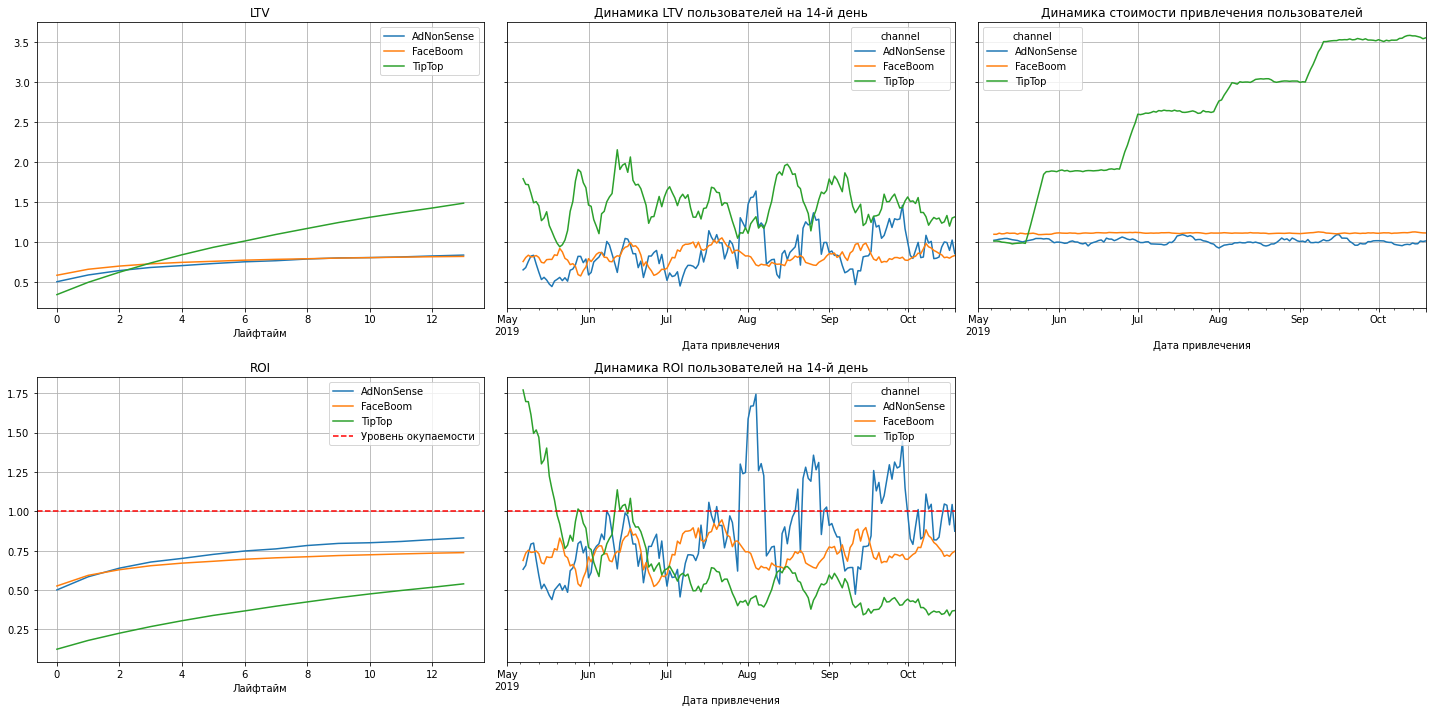

In [80]:
# считаем LTV и ROI в разрезе рекламных каналов с ROI < 1
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_weak_channels, orders, observation_date, horizon_days, dimensions=['channel']
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

- По каналу `TipTop` стоимость привлечения пользователей кратно выросла, а окупаемость резко упала и находится на самом низком уровне среди всех каналов привлечения.
- По каналу `FaceBoom` все показатели стабильны, практически не меняются с течением времени, и при этом ROI не дотягивает до 75%.
- По каналу `AdNonSense` есть периоды, когда мы выходим на уровень окупаемости.

Проверим, в каких странах используются рекламные каналы, которые не окупаются:

In [81]:
#определяем страны в которых используются "слабые" рекламные каналы
for channel in weak_channels:
    print("Рекламный канал {}: ".format(channel))
    print(profiles.query('channel==@channel')
          .groupby('region')
          .agg({'user_id' : 'nunique'})
          .rename(columns=({'user_id' : 'number_of_users'}))
    , "\n")


Рекламный канал TipTop: 
               number_of_users
region                        
United States            19561 

Рекламный канал FaceBoom: 
               number_of_users
region                        
United States            29144 

Рекламный канал AdNonSense: 
         number_of_users
region                  
France              1366
Germany             1219
UK                  1295 



Источники привлечения `TipTop` и `FaceBoom` работают только на рынке США. Видимо неэффективность этих рекламных каналов негативно сказывается на стоимости привлечения клиента в США и в итоге приводит к тому, что США не выходит на уровень окупаемости, в отличие от других стран.

Посмотрим на конверсию и удержание в разрезе стран.

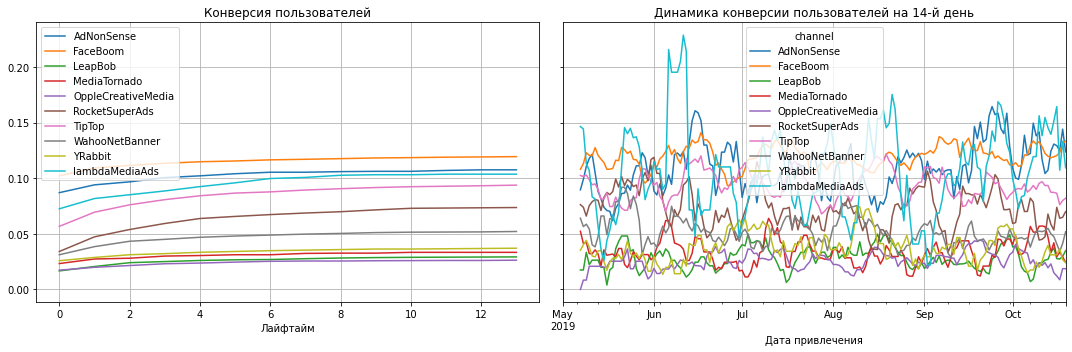

In [82]:
# считаем конверсию и её динамику для 14-го дня в разрезе рекламных каналов
conversion_raw, conversion, conversion_history = get_conversion(profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel']
)

#строим графики
plot_conversion(conversion, conversion_history, horizon_days, window=7)


Каналы с низким ROI в части конверсии чувствуют себя хорошо, находятся среди лидеров.

Проверим удержание.

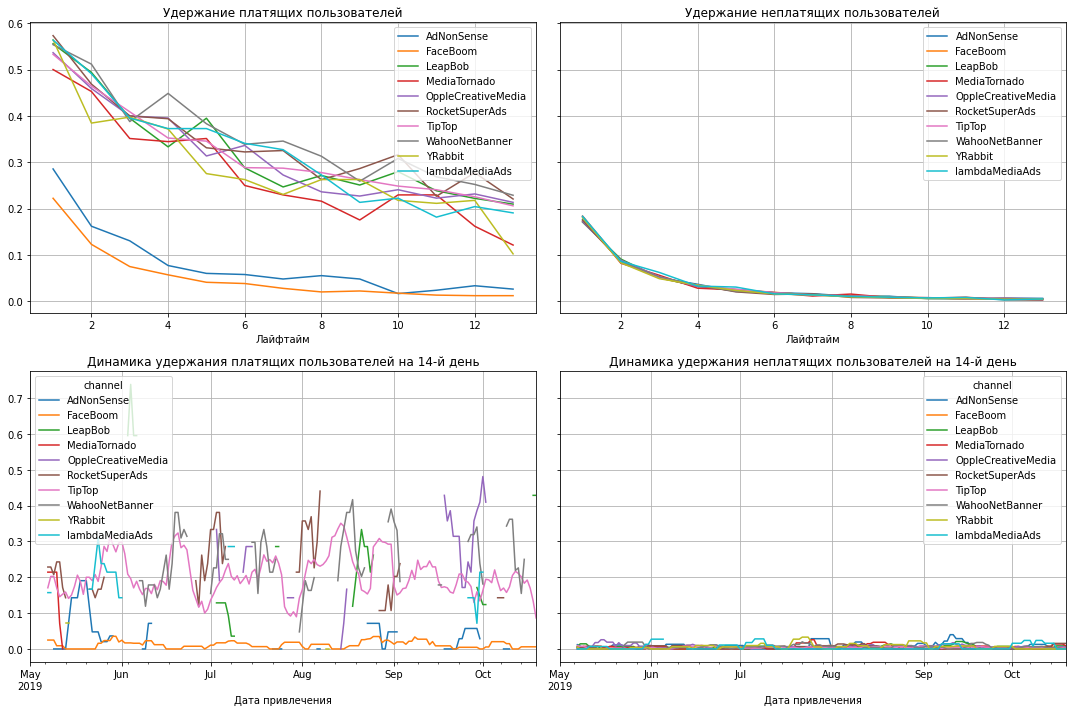

In [83]:
# считаем удержание пользователей и динамику удержания на 14-й день в разрезе рекламных каналов
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

#строим графики
plot_retention(retention, retention_history, horizon_days, window=7)


Для рекламных каналов `FaceBoom` и `AdNonSense` удержание платящих пользователей находится на очень низком уровне. Возможно это связано с техническими ошибками, возникающими при переходе с этих каналов. У нас нет данных о технических событиях, поэтому гипотезу о наличии таких ошибок можем проверить только на данных о продолжительности сессий. Такой анализ проведём в следующем подразделе, а пока завершим рассмотрение рекламных каналов, и посмотрим отдельно на те, по котором ROI превышает единицу.

In [84]:
# считаем LTV и ROI в разрезе рекламных каналов
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

# определяем список рекламных каналов, по которым ROI больше 1 на 14-й день
df_strong_channels = (roi_grouped.reset_index()[roi_grouped.reset_index()[13]>=1][['channel', 13]]
                      .sort_values(by=13, ascending=False)
)
display(df_strong_channels)
strong_channels=list(df_strong_channels['channel'])

channel      13.0
8             YRabbit  2.578086
3        MediaTornado  2.436519
9      lambdaMediaAds  2.428712
2             LeapBob  2.252399
5      RocketSuperAds  2.237019
4  OppleCreativeMedia  1.637075
7      WahooNetBanner  1.526304

In [85]:
#выделяем профили пользователей по источника превлечения с ROI > 1
profiles_strong_channels = profiles.query('channel in @strong_channels')

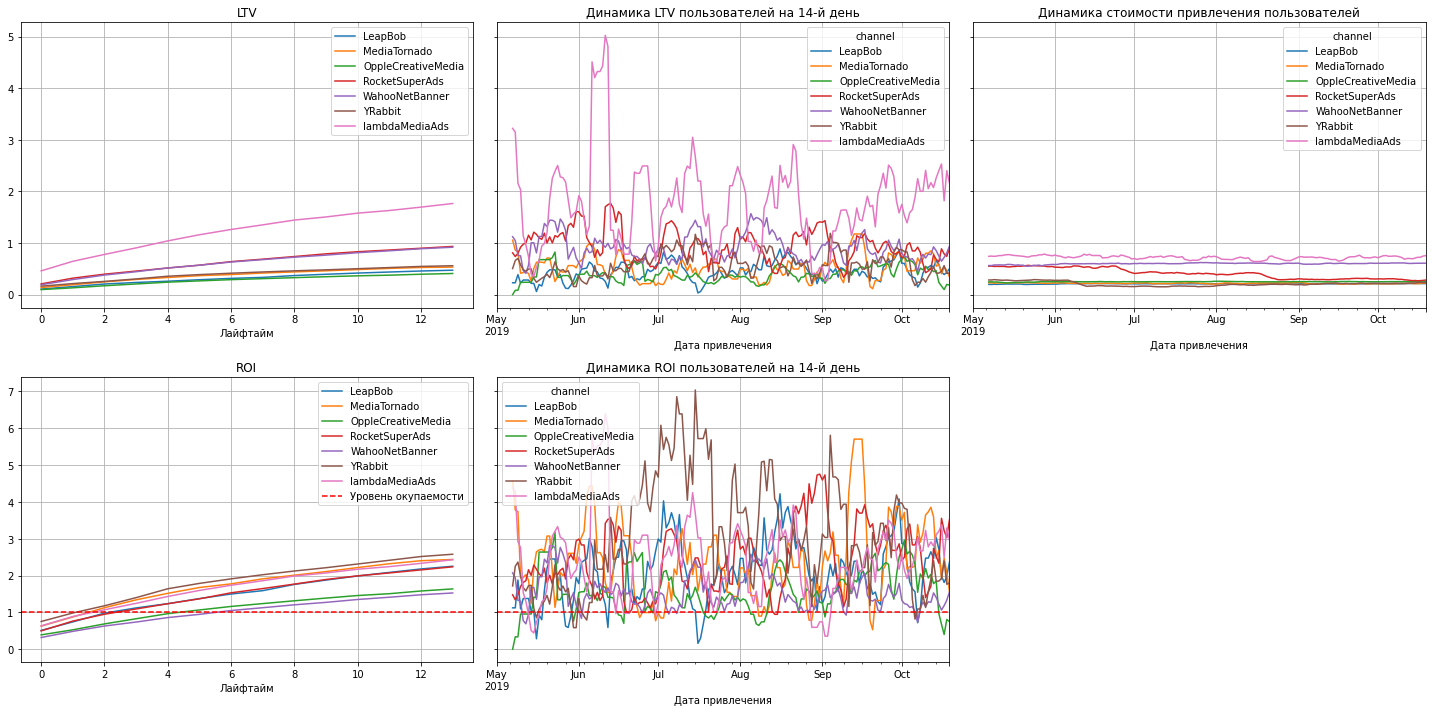

In [86]:
# считаем LTV и ROI в разрезе рекламных каналов с ROI > 1
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_strong_channels, orders, observation_date, horizon_days, dimensions=['channel']
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

In [87]:
#определяем страны в которых используются рекламные каналы, у которых ROI>1
for channel in strong_channels:
    print("Рекламный канал {}: ".format(channel))
    print(profiles.query('channel==@channel')
          .groupby('region')
          .agg({'user_id' : 'nunique'})
          .rename(columns=({'user_id' : 'number_of_users'}))
    , "\n")


Рекламный канал YRabbit: 
               number_of_users
region                        
United States             4312 

Рекламный канал MediaTornado: 
               number_of_users
region                        
United States             4364 

Рекламный канал lambdaMediaAds: 
         number_of_users
region                  
France               742
Germany              649
UK                   758 

Рекламный канал LeapBob: 
         number_of_users
region                  
France              2988
Germany             2519
UK                  3046 

Рекламный канал RocketSuperAds: 
               number_of_users
region                        
United States             4448 

Рекламный канал OppleCreativeMedia: 
         number_of_users
region                  
France              2991
Germany             2562
UK                  3052 

Рекламный канал WahooNetBanner: 
         number_of_users
region                  
France              2971
Germany             2579
UK             

- Окупается реклама по семи источникам привлечения (для них ROI>1), из них пять рекламных каналов превышают уровень окупаемости более чем в два раза (ROI>2)
- Среди рекламных каналов с ROI>2: три работают на рынке США: `YRabbit`, `MediaTornado` и `RocketSuperAds`, и два работают на европейском рынке: `lambdaMediaAds` и `LeapBob`

### Анализ продолжительности пользовательских сессий

Для проверки гипотезы о том, что плохое удержание пользователей по рекламным каналам `FaceBoom` и `AdNonSense` может быть связано с техническими или иными проблемами, проверим продолжительность пользовательских сессиий в разрезе источников привлечения пользователей.

In [88]:
#смотрим какая информацию о сессиях у нас есть
visits.head()

user_id         region   device  channel       session_start  \
0  981449118918  United States   iPhone  organic 2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic 2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic 2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop 2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic 2019-05-01 03:33:35   

          session_end  
0 2019-05-01 02:45:01  
1 2019-05-01 04:47:35  
2 2019-05-01 15:32:08  
3 2019-05-01 00:54:25  
4 2019-05-01 03:57:40

In [89]:
## выделяем год, номер месяца и номер недели из времени начала сессии
visits['session_date'] = visits['session_start'].dt.date
visits['session_year'] = visits['session_start'].dt.year
visits['session_month'] = visits['session_start'].dt.month
visits['session_week'] = visits['session_start'].dt.isocalendar().week
visits.head()

user_id         region   device  channel       session_start  \
0  981449118918  United States   iPhone  organic 2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic 2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic 2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop 2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic 2019-05-01 03:33:35   

          session_end session_date  session_year  session_month  session_week  
0 2019-05-01 02:45:01   2019-05-01          2019              5            18  
1 2019-05-01 04:47:35   2019-05-01          2019              5            18  
2 2019-05-01 15:32:08   2019-05-01          2019              5            18  
3 2019-05-01 00:54:25   2019-05-01          2019              5            18  
4 2019-05-01 03:57:40   2019-05-01          2019              5            18

Для общей информации посмотрим на динамику по количеству уникальных пользователей в месяц и неделю.

In [90]:
mau = visits.groupby(['session_year','session_month']).agg({'user_id' : 'nunique'})
dau = visits.groupby('session_date').agg({'user_id' : 'nunique'})
wau = visits.groupby(['session_year', 'session_week']).agg({'user_id' : 'nunique'})

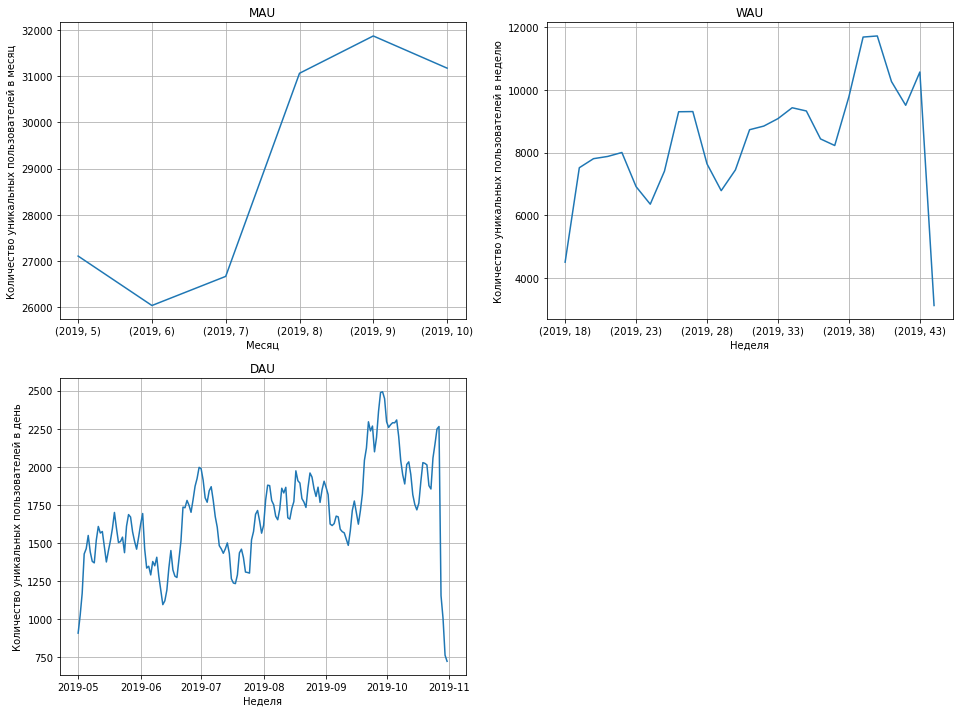

In [91]:
plt.figure(figsize=(16,12))
ax1 = plt.subplot(2,2,1)
mau.plot(grid=True, legend=None, ax=ax1)
plt.xlabel('Месяц')
plt.ylabel('Количество уникальных пользователей в месяц')
plt.title('MAU')

ax2 = plt.subplot(2,2,2)
wau.plot(grid=True, legend=None, ax=ax2)
plt.xlabel('Неделя')
plt.ylabel('Количество уникальных пользователей в неделю')
plt.title('WAU')

ax3 = plt.subplot(2,2,3)
dau.plot(grid=True, legend=None, ax=ax3)
plt.xlabel('Неделя')
plt.ylabel('Количество уникальных пользователей в день')
plt.title('DAU')

plt.show()

Есть тенденция к увеличению количества пользователей, пользующихся приложением. (Спад в конце графика не показателен, так как он происходит из-за неполноты данных за последний день/неделю/месяц, так как этот последний период ещё продолжается в момент анализа)

Посчитаем среднюю и медианную продолжительность сессий

In [92]:
#вычисляем продолжительность сессии для каждого визита
visits['session_duration_sec'] = (visits['session_end'] - visits['session_start']).dt.seconds
#считаем среднюю и медианную продолжительность сессии для всего набора данных
print('Средняя продолжительность сессии:   {} сек.'.format(round(visits['session_duration_sec'].mean())))
print('Медианная продолжительность сессии: {} сек.'.format(round(visits['session_duration_sec'].median())))

Средняя продолжительность сессии:   1800 сек.
Медианная продолжительность сессии: 1244 сек.


Пользователи прокрастинируют в нашем приложении более 20 минут, как показывает медианная продолжительность сессии.

Посмотрим на среднюю и медианную продолжительность сессии в разрезе источников привлечения пользователей.

In [93]:
#считаем среднюю и медианную продолжительность сессии в разрезе рекламных каналов
visits.groupby('channel').agg({'session_duration_sec' : ['mean', 'median']})

session_duration_sec        
                                   mean  median
channel                                        
AdNonSense                  1782.369758  1224.0
FaceBoom                    1801.115846  1248.0
LeapBob                     1801.976195  1263.0
MediaTornado                1780.264474  1228.0
OppleCreativeMedia          1777.902346  1220.5
RocketSuperAds              1811.027821  1250.0
TipTop                      1812.314596  1249.0
WahooNetBanner              1765.900122  1231.0
YRabbit                     1837.695018  1245.0
lambdaMediaAds              1789.681727  1238.0
organic                     1802.007294  1244.0

Не наблюдается каких-то особых отличий по продолжительности сессии в зависимости от источника привлечения пользователя.

Сравним на всякий случай как распределяется частотность длительности сессий для всех пользователей, и отдельно для худшего по ROI канала `FaceBoom` и для худшего по значению ROI канала `YRabbit`.

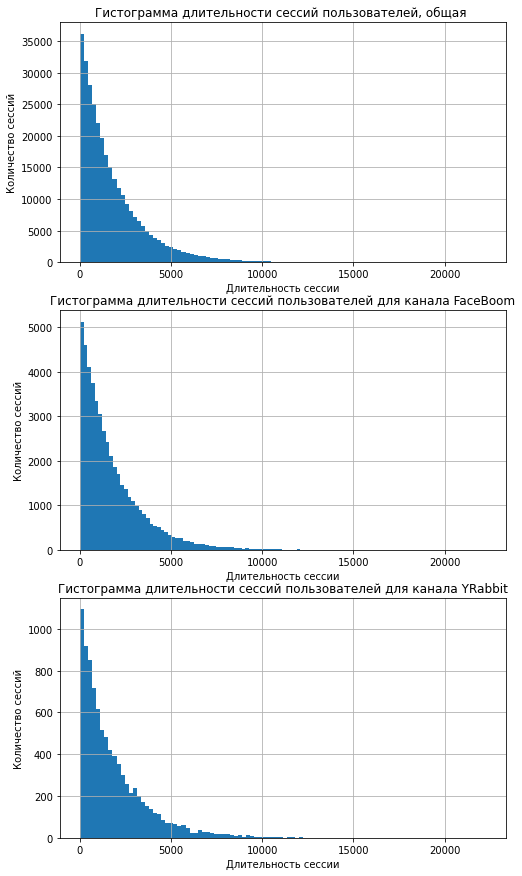

In [94]:
plt.figure(figsize=(8,15))
ax1 = plt.subplot(3,1,1)
visits['session_duration_sec'].hist(bins=100, ax=ax1)
plt.xlabel('Длительность сессии')
plt.ylabel('Количество сессий')
plt.title('Гистограмма длительности сессий пользователей, общая ')

ax2 = plt.subplot(3,1,2, sharex=ax1)
visits.query('channel=="FaceBoom"')['session_duration_sec'].hist(bins=100, ax=ax2)
plt.xlabel('Длительность сессии')
plt.ylabel('Количество сессий')
plt.title('Гистограмма длительности сессий пользователей для канала FaceBoom')

ax3 = plt.subplot(3,1,3, sharex=ax1)
visits.query('channel=="YRabbit"')['session_duration_sec'].hist(bins=100, ax=ax3)
plt.xlabel('Длительность сессии')
plt.ylabel('Количество сессий')
plt.title('Гистограмма длительности сессий пользователей для канала YRabbit')
plt.show()

Не фиксируем отличий в длительности сессий и их распределении в зависимости от рекламных каналов. Гипотеза о том, что причина низкого удержания для каналов `FaceBoom` и `AdNonSense` как-то связана с длительностью сессии, не подтверждается. 
Соответственно мы зафиксировали, что для каналов `FaceBoom` и `AdNonSense` есть проблема с удержанием пользователей, но в чём кроется её причина не можем определить. Видимо для расследования причин требуются дополнительные данные, например о событиях в работе приложения. Также может быть, что причина связана не с техническими проблемами, а как-то зависит от особенностей рекламных кампаний, проводящихся по данным канала, в результате чего пользователи совершают покупку, но затем перестают пользоваться приложением.

**Выводы по разделу "Оценка окупаемости рекламы":**

- Реклама, направленная на привлечение пользователей, в целом не окупается. ROI по истечении двух недель составляет около 80.
- Негативное влияние на окупаемость рекламы оказывает регион США и рекламные каналы `TipTop`, `FaceBoom` и `AdNonSense`.
- Проблемы окупаемости могут быть вызваны неэффективностью рекламных каналов, на которые тратится большая часть рекламного бюджета. 
    - По каналу `TipTop` растёт стоимость привлечения клиента, так как расходы на рекламу по этому каналу постоянно повышаются, а количество привлеченных пользователей не увеличивается.
    - По каналам `FaceBoom` и `AdNonSense` очень низкий уровень удержания платящих пользователей. Он почти не отличается от уровня удержания неплатящих пользователей и по истечении двух недель стремится к нулю.
    
**Рекомендации для рекламного отдела:**

В части распределения рекламного бюджета можно рекомендовать:
- Уменьшить бюджет на рекламу по каналу `TipTop`, вернуть его к уровню мая 2019 года.
- Рассмотреть возможность увеличения бюджета для привлечения  по каналам `YRabbit`, `MediaTornado` и `RocketSuperAds` на рынке США, и `lambdaMediaAds`, `LeapBob` на европейском рынке.


## Выводы

В рамках исследования мы установили:

- Регионы:
    - Пользователи приходят в приложение из четырёх стран: `США`, `Великобритании`, `Франции` и `Германии`.
    - `США` является лидером по общему количеству пользователей, по доле платящих пользователей и по количеству платящих пользователей.
    
- Устройства:
    - Клиенты используют 4 вида устройств: два из них - компьютеры семейств `Mac` и `PC`, и ещё два - мобильные устройства - `iPhone` и `Android`.
    - По доле платящих пользователей лидируют устройства фирмы Apple: `Mac` и `iPhone`. Наибольшее количество платящих пользователей предпочитают `iPhone`.

- Рекламные каналы:
    - наибольшее количество платящих пользователей привлечены через рекламные каналы `FaceBoom` и `TipTop`. Вместе они привлекли более 60% платящих пользователей.
    - Хорошие показатели по доле платящих клиентов имеют каналы `AdNonSense` и `lambdaMediaAds`, а также `FaceBoom` и `TipTop`.

- Маркетинг:
    - Общая сумма расходов на маркетинг составила 105497 долларов.
    - 82% рекламного бюджета потрачено на каналы `TipTop` (52%) и `FaceBoom` (30%).
    - Расходы на рекламу растут. Наибольший рост приходится на канал `TipTop`, затраты на него растут каждый месяц. Вторым по затратам идёт канал `FaceBoom`, расходы на который  выросли в мае-июне и с тех пор держатся примерно на одном уровне.
    - Привлечение одного пользователя наиболее дорого обходится в канале `TipTop`. Стоимость клиента в этом канале в 2.5 раза выше по сравнению с идущими на втором-третьем местах по этому показателю источниками клиентов: `FaceBoom` и `AdNonSense`.
    
- Окупаемость рекламы:
    - Реклама в целом не окупается. ROI по истечении двух недель составляет около 80%.
    - Наибольшее негативное влияние на окупаемость рекламы оказывает регион США:
        - в США используются неэффективные рекламные каналы  и рекламные каналы `TipTop`, `FaceBoom` и `AdNonSense`,
        - более 80% рекламного бюджета тратятся на работающие в США рекламные каналы `TipTop`, `FaceBoom`,
        - в США низкий уровень удержания платящих клиентов.
    - В разрезе типов устройств отметили негативную тенденцию для `PC`, который с сентября перестал окупаться, а уровень конверсии для PC существенно уступает конверсии на других устройствах.    
    - По каналу `TipTop` растут расходы на рекламу, при этом количество привлеченных пользователей не увеличивается.
    - По каналу `FaceBoom` очень низкий уровень удержания клиентов.
    - Канал `AdNonSense` лишь в некоторые периоды выходит на уровень окупаемости. На момент анализа не оправдывает затрат на рекламу.
    

**Рекомендации для отдела маркетинга**

- Уменьшить бюджет на рекламу по каналу `TipTop`, вернуть его к уровню мая 2019 года.
- Продолжить расследование для выяснения причин низкого удержания пользователей по каналу `FaceBoom`.
- В качестве рекламных каналов в США попробовать более широко использовать `YRabbit`, у которого лучший показатель по ROI и `RocketSuperAds`, у которого неплохая доля платящих пользователей.
- Провести анализ для выявления причин низкой конверсии пользователей `PC`.
- Для большей диверсификации по регионам желательно увеличить долю пользователей в европейском регионе. Наиболее подходящим рекламным каналом для европейских стран по показателям ROI и доли платящих пользователей является `lambdaMediaAds`.
